# CLASSIFICANDO DADOS DE DIABETES COM REGRESSÃO LOGÍSTICA E SUPPORT VECTOR MACHINE

**SOBRE OS DADOS**

O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) e possui as seguintes variáveis:


**1)** PregnanciesNumber : Número de vezes que esteve grávida;

**2)** GlucosePlasma : Concentração de glicose a 2 horas em um teste oral de tolerância à glicose;

**3)** BloodPressureDiastolic : pressão sanguínea (mm Hg)

**4)** SkinThicknessTriceps : Espessura da dobra cutânea (mm)

**5)** Insulin : Insulina sérica de 2 horas (mu U/ml)

**6)** BMI : Índice de massa corporal (IMC)

**7)** DiabetesPedigreeFunction : Função pedigree do diabetes

**8)** Age : Idade (em anos)

**9)** OutcomeClass : Variável de resultado (0 ou 1) 268 de 768 são 1, os outros resultados são 0.

Se for diabético o resultado será 1 e caso não seja, o resultado é zero.


**METODOLOGIA**

Os modelos usados para classificação de dados serão a regressão logística, Support Vector Machine (SVM), Cat Boost e de Árvore Aleatória (Random Forest). A regressão logística faz parte da classe de regressão de respostas dicotômicas, ou seja, binárias; onde o resultado é ''0'' (geralmente associado a fracasso, não curado, derrota, etc.) ou ''1'' (geralmente associado a sucesso, curado, vitória, etc.). No trabalho em questão classificaremos a partir das features, se o indivíduo é portador (1) ou não (0) de diabetes. Já os modelos SVM, Cat Boost e Random Forest fazem parte de uma classe de algoritmos de classificação supervisionados e não necessariamente classificam, apenas, repostas binárias.

**IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm

**IMPORTANDO OS DADOS**

In [2]:
diabetes=pd.read_csv('diabetes.csv')

**VISUALIZANDO O CONJUNTO DE DADOS**

Abaixo tem o dataset e suas colunas e por padrão o comando head() mostra as 5 primeiras linhas.

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**VISUALIZANDO OS TIPOS DE DADOS DO DATASET**

O dataset tem 768 linhas e nenhuma é nula (ou seja não possui missing values).

In [4]:
#Informações sobre as colunas

#Apenas duas colunas são do tipo float

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**ESTATÍSTICAS DESCRITIVAS DO DATASET**

Podemos ver na tabela abaixo o número de observações, a média, o desvio padrão e outras medidas calculadas provenientes do dataset.

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos também transpor essa tabela.

In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Separando dados de treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
features = diabetes.drop(['Outcome'],axis=1,inplace=False)
classe=diabetes['Outcome']

In [9]:
X_treino,X_teste,y_treino,y_teste=train_test_split(features,classe,random_state=42)

In [10]:
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((576, 8), (192, 8), (576,), (192,))

In [11]:
bases=[X_treino,X_teste]

# Análise e tratamento da coluna Pregnancies

Abaixo vamos observar alguns gráfico e ver se é possível extrair informações da relação entre variáveis

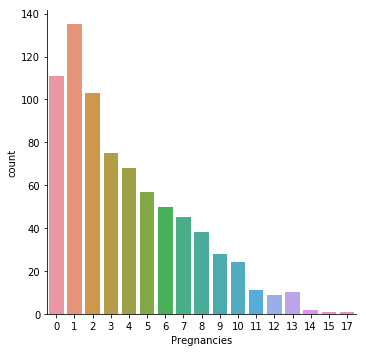

In [12]:
sns.catplot(x="Pregnancies", kind="count", data=diabetes)

In [13]:
diabetes[['Pregnancies','Outcome']].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#A tabela abaixo mostra a taxa de mulheres grávidas por diabetes

#Aparentemente, quantos mais filhos uma mulher tem, maior a chance dela ter diabetes.

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


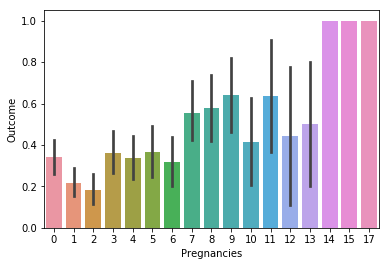

In [14]:
sns.barplot(x="Pregnancies", y="Outcome", data=diabetes)

#O gráfico abaixo mostra o mesmo resultado da tabela acima

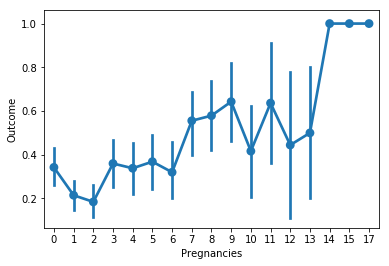

In [15]:
sns.pointplot(x="Pregnancies", y="Outcome", data=diabetes)

#Visualizando em um gráfico de linhas

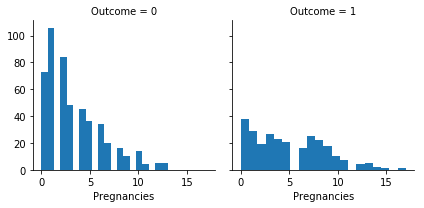

In [16]:
g = sns.FacetGrid(diabetes, col='Outcome')
g.map(plt.hist, 'Pregnancies',bins=20)

#No gráfico abaixo gerado pelo FaceGrid, separamos os resultados 0 e 1

#As não-ocorrências de diabetes foram bem maiores em mulheres que não tiverem filhos

In [17]:
#Vamos fazer um breve tratamento na coluna Pregnancies e criando intervalos de valores

diabetes['Faixa_Pregnancies']=pd.cut(diabetes['Pregnancies'], 4)
diabetes['Faixa_Pregnancies']

0         (4.25, 8.5]
1      (-0.017, 4.25]
2         (4.25, 8.5]
3      (-0.017, 4.25]
4      (-0.017, 4.25]
            ...      
763      (8.5, 12.75]
764    (-0.017, 4.25]
765       (4.25, 8.5]
766    (-0.017, 4.25]
767    (-0.017, 4.25]
Name: Faixa_Pregnancies, Length: 768, dtype: category
Categories (4, interval[float64]): [(-0.017, 4.25] < (4.25, 8.5] < (8.5, 12.75] < (12.75, 17.0]]

In [18]:
diabetes['Faixa_Pregnancies'].value_counts(ascending=False)

#Aqui podemos visualizar melhor por faixa

(-0.017, 4.25]    492
(4.25, 8.5]       190
(8.5, 12.75]       72
(12.75, 17.0]      14
Name: Faixa_Pregnancies, dtype: int64

In [19]:
diabetes[['Faixa_Pregnancies','Outcome']].groupby(['Faixa_Pregnancies'],
                                                  as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Na tabela abaixo podemos ver a taxa de ocorrência de diabetes e coincide com o que observamos anteriormente
#A medida que uma mulher tem mais filhos, a chance de adquirir diabetes é maior.

,Faixa_Pregnancies,Outcome
3,"(12.75, 17.0]",0.642857
2,"(8.5, 12.75]",0.541667
1,"(4.25, 8.5]",0.442105
0,"(-0.017, 4.25]",0.276423


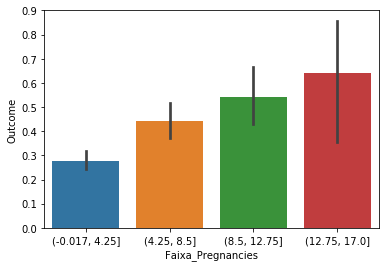

In [20]:
sns.barplot(x="Faixa_Pregnancies", y="Outcome", data=diabetes)

#Visualizando graficamente

In [21]:
for i in bases:    
    i.loc[ i['Pregnancies'] <= 4.25, 'Pregnancies'] = 0
    i.loc[(i['Pregnancies'] > 4.25) & (i['Pregnancies'] <= 8.5), 'Pregnancies'] = 1
    i.loc[(i['Pregnancies'] > 8.5) & (i['Pregnancies'] <= 12.75), 'Pregnancies'] = 2
    i.loc[i['Pregnancies'] > 12.75,'Pregnancies'] = 3

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,129,0,30,0,39.9,0.569,44
73,0,129,86,20,270,35.1,0.231,23
352,0,61,82,28,0,34.4,0.243,46
497,0,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,98,58,33,190,34.0,0.430,43
324,0,112,75,32,0,35.7,0.148,21
624,0,108,64,0,0,30.8,0.158,21
690,1,107,80,0,0,24.6,0.856,34
473,1,136,90,0,0,29.9,0.210,50


In [23]:
display(X_treino['Pregnancies'].value_counts(ascending=False))
display(X_teste['Pregnancies'].value_counts(ascending=False))

0    372
1    145
2     50
3      9
Name: Pregnancies, dtype: int64

0    120
1     45
2     22
3      5
Name: Pregnancies, dtype: int64

# Análise e tratamento a coluna Age

In [24]:
#Na coluna Age não há dados faltantes

diabetes['Age'].isna().sum()

0

In [25]:
#Também é bom conferir se há alguém com idade zerada, o que acaba não sendo computado no isna().sum()

diabetes['Age'].value_counts(ascending=False)

#Como podemos ver, não há idades com valores zero

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

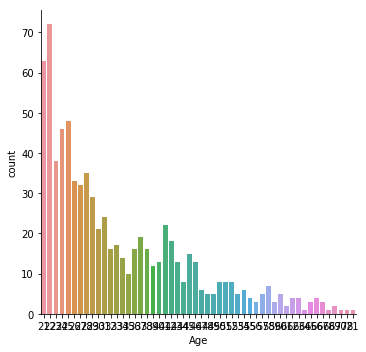

In [26]:
sns.catplot(x="Age", kind="count", data=diabetes)

#Visualizando o resultado acima graficamente

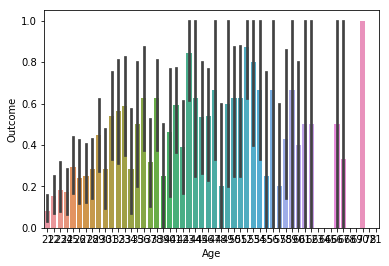

In [27]:
sns.barplot(x="Age",y="Outcome", data=diabetes)

#O gráfico abaixo mostra

In [28]:
#Criando as faixas

diabetes['Faixa_Age']=pd.cut(diabetes['Age'], 4)
diabetes['Faixa_Age']

0       (36.0, 51.0]
1      (20.94, 36.0]
2      (20.94, 36.0]
3      (20.94, 36.0]
4      (20.94, 36.0]
           ...      
763     (51.0, 66.0]
764    (20.94, 36.0]
765    (20.94, 36.0]
766     (36.0, 51.0]
767    (20.94, 36.0]
Name: Faixa_Age, Length: 768, dtype: category
Categories (4, interval[float64]): [(20.94, 36.0] < (36.0, 51.0] < (51.0, 66.0] < (66.0, 81.0]]

In [29]:
diabetes['Faixa_Age'].value_counts(ascending=False)

#Para idade, a maioria das mulheres se encontram com idade entre 21 e 36 anos

(20.94, 36.0]    514
(36.0, 51.0]     181
(51.0, 66.0]      64
(66.0, 81.0]       9
Name: Faixa_Age, dtype: int64

In [30]:
diabetes[['Faixa_Age','Outcome']].groupby(['Faixa_Age'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Curioso dos dados de idade, que a taxa de ocorrência de diabetes é maior nas faixas intermediárias

,Faixa_Age,Outcome
1,"(36.0, 51.0]",0.519337
2,"(51.0, 66.0]",0.484375
0,"(20.94, 36.0]",0.274319
3,"(66.0, 81.0]",0.222222


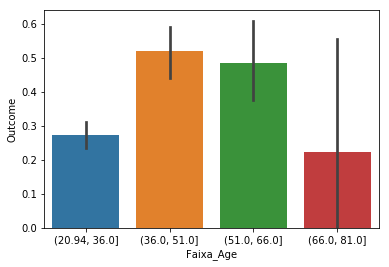

In [31]:
sns.barplot(x="Faixa_Age", y="Outcome", data=diabetes)

#Visualizando o resultado anterior graficamente

In [32]:
#Vamos fazer a mesma coisa que fizemos com a coluna Pregnancies

for i in bases:    
    i.loc[ i['Age'] <= 36, 'Age'] = 0
    i.loc[(i['Age'] >36) & (i['Age'] <= 51), 'Age'] = 1
    i.loc[(i['Age'] > 51) & (i['Age'] <= 66), 'Age'] = 2
    i.loc[i['Age'] > 66,'Age'] = 3

In [33]:
display(X_treino['Age'].value_counts(ascending=False))
display(X_teste['Age'].value_counts(ascending=False))

0    390
1    138
2     40
3      8
Name: Age, dtype: int64

0    124
1     43
2     24
3      1
Name: Age, dtype: int64

In [34]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,129,0,30,0,39.9,0.569,1
73,0,129,86,20,270,35.1,0.231,0
352,0,61,82,28,0,34.4,0.243,1
497,0,81,72,15,76,30.1,0.547,0
145,0,102,75,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,98,58,33,190,34.0,0.430,1
324,0,112,75,32,0,35.7,0.148,0
624,0,108,64,0,0,30.8,0.158,0
690,1,107,80,0,0,24.6,0.856,0
473,1,136,90,0,0,29.9,0.210,1


# Análise e tratamento da coluna Glucose

In [35]:
diabetes['Glucose'].isna().sum()

0

In [36]:
diabetes['Glucose'].value_counts(ascending=False)

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

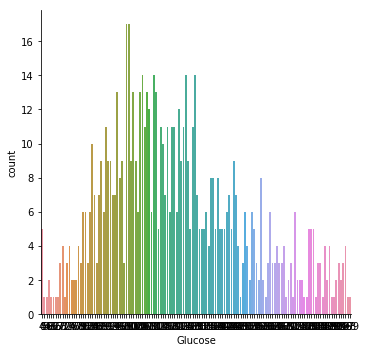

In [37]:
sns.catplot(x="Glucose", kind="count",data=diabetes)

In [38]:
diabetes['Faixa_Glucose']=pd.cut(diabetes['Glucose'], 3)
diabetes['Faixa_Glucose']

0       (132.667, 199.0]
1      (66.333, 132.667]
2       (132.667, 199.0]
3      (66.333, 132.667]
4       (132.667, 199.0]
             ...        
763    (66.333, 132.667]
764    (66.333, 132.667]
765    (66.333, 132.667]
766    (66.333, 132.667]
767    (66.333, 132.667]
Name: Faixa_Glucose, Length: 768, dtype: category
Categories (3, interval[float64]): [(-0.199, 66.333] < (66.333, 132.667] < (132.667, 199.0]]

In [39]:
diabetes['Faixa_Glucose'].value_counts(ascending=False)

(66.333, 132.667]    515
(132.667, 199.0]     241
(-0.199, 66.333]      12
Name: Faixa_Glucose, dtype: int64

In [40]:
diabetes[['Faixa_Glucose','Outcome']].groupby(['Faixa_Glucose'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Aqui podemos ver que quem possui glicose muito alta tem altas chances de adquirir diabetes, o que é algo óbvio.

,Faixa_Glucose,Outcome
2,"(132.667, 199.0]",0.639004
1,"(66.333, 132.667]",0.217476
0,"(-0.199, 66.333]",0.166667


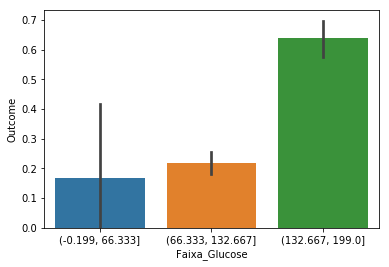

In [41]:
sns.barplot(x="Faixa_Glucose", y="Outcome", data=diabetes)

In [42]:
for i in bases:    
    i.loc[ i['Glucose'] <= 66.333, 'Glucose'] = 0
    i.loc[(i['Glucose'] >66.333) & (i['Glucose'] <= 132.667), 'Glucose'] = 1
    i.loc[i['Glucose'] > 132.667,'Glucose'] = 2

In [43]:
display(X_treino['Glucose'].value_counts(ascending=False))
display(X_teste['Glucose'].value_counts(ascending=False))

1    393
2    172
0     11
Name: Glucose, dtype: int64

1    122
2     69
0      1
Name: Glucose, dtype: int64

In [44]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,30,0,39.9,0.569,1
73,0,1,86,20,270,35.1,0.231,0
352,0,0,82,28,0,34.4,0.243,1
497,0,1,72,15,76,30.1,0.547,0
145,0,1,75,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,58,33,190,34.0,0.430,1
324,0,1,75,32,0,35.7,0.148,0
624,0,1,64,0,0,30.8,0.158,0
690,1,1,80,0,0,24.6,0.856,0
473,1,2,90,0,0,29.9,0.210,1


# Análise e tratamento da coluna BloodPressure

In [45]:
#Não há missing values

diabetes['BloodPressure'].isna().sum()

0

In [46]:
diabetes['BloodPressure'].value_counts(ascending=True)

#Como podemos ver abaxio, há 35 observações com valores iguais a zero, o que não faz sentido algum

#Teremos que pegar esse valores e substituir ou pela média, ou pela mediana ou pela moda ou atribuir uma constante.

122     1
114     1
102     1
61      1
95      1
24      1
38      1
40      1
46      2
55      2
30      2
104     2
108     2
106     3
98      3
100     3
110     3
96      4
44      4
48      5
85      6
94      6
65      7
75      8
92      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
0      35
60     37
76     39
80     40
64     43
72     44
78     45
68     45
74     52
70     57
Name: BloodPressure, dtype: int64

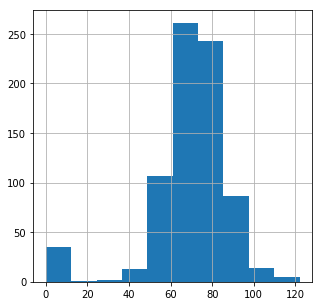

In [47]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Observando o gráfico, os dados parecem se comportar como uma distribuição normal

In [48]:
(diabetes['BloodPressure'].median(), diabetes['BloodPressure'].mean(),
 diabetes['BloodPressure'].median() - diabetes['BloodPressure'].mean())

#A diferença entre a média e mediana parecem ser pequenas

#então substuiremos os valores ausentes pela mediana

(72.0, 69.10546875, 2.89453125)

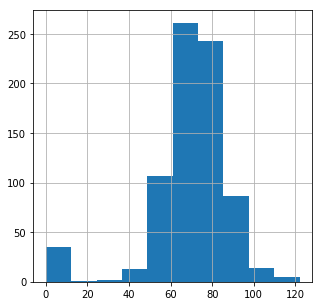

In [49]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Agora a distribuição parece mais com uma normal

In [50]:
#Imputando valores ausente com a mediana

dia_mean=diabetes['BloodPressure'].median()
diabetes['BloodPressure'].replace(0,dia_mean, inplace=True)

In [51]:
diabetes['BloodPressure'].value_counts(ascending=True)

24      1
102     1
95      1
114     1
61      1
122     1
38      1
40      1
104     2
55      2
46      2
30      2
108     2
100     3
98      3
106     3
110     3
96      4
44      4
48      5
94      6
85      6
65      7
92      8
75      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
60     37
76     39
80     40
64     43
78     45
68     45
74     52
70     57
72     79
Name: BloodPressure, dtype: int64

In [52]:
diabetes['Faixa_Blood']=pd.cut(diabetes['BloodPressure'], 3)
diabetes['Faixa_Blood']

0      (56.667, 89.333]
1      (56.667, 89.333]
2      (56.667, 89.333]
3      (56.667, 89.333]
4      (23.902, 56.667]
             ...       
763    (56.667, 89.333]
764    (56.667, 89.333]
765    (56.667, 89.333]
766    (56.667, 89.333]
767    (56.667, 89.333]
Name: Faixa_Blood, Length: 768, dtype: category
Categories (3, interval[float64]): [(23.902, 56.667] < (56.667, 89.333] < (89.333, 122.0]]

In [53]:
diabetes['Faixa_Blood'].value_counts(ascending=False)

#A maior concentração de mulher está naquelas que tem entre 56 a 89 de pressão sanguínea

(56.667, 89.333]    643
(23.902, 56.667]     65
(89.333, 122.0]      60
Name: Faixa_Blood, dtype: int64

In [54]:
diabetes[['Faixa_Blood','Outcome']].groupby(['Faixa_Blood'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#E podemos notar que a medida que a pressão sanguínea aumenta, aumenta a chance de ter diabetes

,Faixa_Blood,Outcome
2,"(89.333, 122.0]",0.483333
1,"(56.667, 89.333]",0.349922
0,"(23.902, 56.667]",0.215385


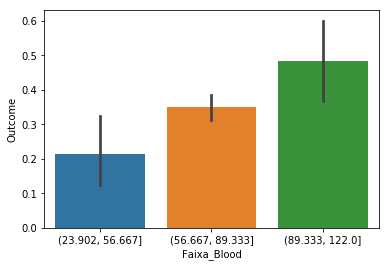

In [55]:
sns.barplot(x="Faixa_Blood", y="Outcome", data=diabetes)

In [56]:
for i in bases:    
    i.loc[ i['BloodPressure'] <= 56.667, 'BloodPressure'] = 0
    i.loc[(i['BloodPressure'] >56.667) & (i['BloodPressure'] <= 89.333), 'BloodPressure'] = 1
    i.loc[i['BloodPressure'] > 89.333,'BloodPressure'] = 2

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,30,0,39.9,0.569,1
73,0,1,1,20,270,35.1,0.231,0
352,0,0,1,28,0,34.4,0.243,1
497,0,1,1,15,76,30.1,0.547,0
145,0,1,1,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,1,33,190,34.0,0.430,1
324,0,1,1,32,0,35.7,0.148,0
624,0,1,1,0,0,30.8,0.158,0
690,1,1,1,0,0,24.6,0.856,0
473,1,2,2,0,0,29.9,0.210,1


# Análise tratamento da coluna SkinThickness

In [58]:
diabetes['SkinThickness'].isna().sum()

0

In [59]:
diabetes['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

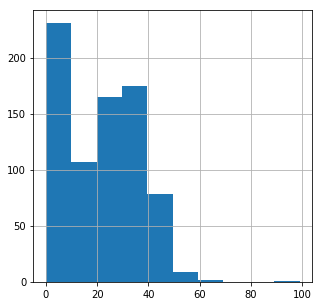

In [60]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Distribuição da coluna SkinThickness

In [61]:
(diabetes['SkinThickness'].median(), diabetes['SkinThickness'].mean(),diabetes['SkinThickness'].mode(),
 diabetes['SkinThickness'].median() - diabetes['SkinThickness'].mean())

#Vemos que diferença entre média e mediana é pequeno

#A moda é 0, o que não faz sentido. Vamos substituir esses valores pela mediana

(23.0, 20.536458333333332, 0    0
 dtype: int64, 2.463541666666668)

In [62]:
#Imputando os valores zero

diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median(),inplace=True)

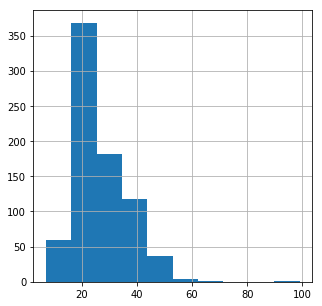

In [63]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Nova distribuição da coluna SkinThickness

In [64]:
#criando as faixas de SkinThickness

diabetes['Faixa_Skin']=pd.cut(diabetes['SkinThickness'], 4)
diabetes['Faixa_Skin']

0       (30.0, 53.0]
1      (6.908, 30.0]
2      (6.908, 30.0]
3      (6.908, 30.0]
4       (30.0, 53.0]
           ...      
763     (30.0, 53.0]
764    (6.908, 30.0]
765    (6.908, 30.0]
766    (6.908, 30.0]
767     (30.0, 53.0]
Name: Faixa_Skin, Length: 768, dtype: category
Categories (4, interval[float64]): [(6.908, 30.0] < (30.0, 53.0] < (53.0, 76.0] < (76.0, 99.0]]

In [65]:
diabetes['Faixa_Skin'].value_counts(ascending=False)

(6.908, 30.0]    530
(30.0, 53.0]     232
(53.0, 76.0]       5
(76.0, 99.0]       1
Name: Faixa_Skin, dtype: int64

In [66]:
diabetes[['Faixa_Skin','Outcome']].groupby(['Faixa_Skin'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_Skin,Outcome
3,"(76.0, 99.0]",1.000000
1,"(30.0, 53.0]",0.452586
2,"(53.0, 76.0]",0.400000
0,"(6.908, 30.0]",0.301887


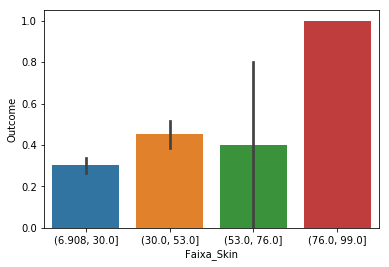

In [67]:
sns.barplot(x="Faixa_Skin", y="Outcome", data=diabetes)

In [68]:
for i in bases:    
    i.loc[ i['SkinThickness'] <= 30, 'SkinThickness'] = 0
    i.loc[(i['SkinThickness'] >30) & (i['SkinThickness'] <= 53), 'SkinThickness'] = 1
    i.loc[(i['SkinThickness'] >53) & (i['SkinThickness'] <= 76), 'SkinThickness'] = 2
    i.loc[i['SkinThickness'] > 76,'SkinThickness'] = 3

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,0,0,39.9,0.569,1
73,0,1,1,0,270,35.1,0.231,0
352,0,0,1,0,0,34.4,0.243,1
497,0,1,1,0,76,30.1,0.547,0
145,0,1,1,0,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,1,1,190,34.0,0.430,1
324,0,1,1,1,0,35.7,0.148,0
624,0,1,1,0,0,30.8,0.158,0
690,1,1,1,0,0,24.6,0.856,0
473,1,2,2,0,0,29.9,0.210,1


# Análise tratamento da coluna Insulin

In [70]:
diabetes['Insulin'].isna().sum()

0

In [71]:
diabetes['Insulin'].value_counts()

#Existem 374 valores iguais a zero

#Precisaremos tratar esses valores

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

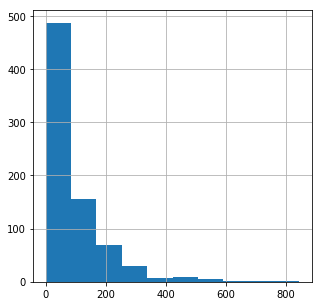

In [72]:
diabetes['Insulin'].hist(figsize=(5,5))

In [73]:
(diabetes['Insulin'].median(), diabetes['Insulin'].mean(),diabetes['Insulin'].mode(),
 diabetes['Insulin'].median() - diabetes['Insulin'].mean())

(30.5, 79.79947916666667, 0    0
 dtype: int64, -49.29947916666667)

In [74]:
diabetes['Insulin'].replace(0,diabetes['Insulin'].median(),inplace=True)

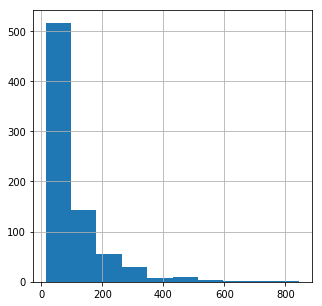

In [75]:
diabetes['Insulin'].hist(figsize=(5,5))

In [76]:
diabetes['Faixa_Insul']=pd.cut(diabetes['Insulin'], 3)
diabetes['Faixa_Insul']

0      (13.168, 291.333]
1      (13.168, 291.333]
2      (13.168, 291.333]
3      (13.168, 291.333]
4      (13.168, 291.333]
             ...        
763    (13.168, 291.333]
764    (13.168, 291.333]
765    (13.168, 291.333]
766    (13.168, 291.333]
767    (13.168, 291.333]
Name: Faixa_Insul, Length: 768, dtype: category
Categories (3, interval[float64]): [(13.168, 291.333] < (291.333, 568.667] < (568.667, 846.0]]

In [77]:
diabetes['Faixa_Insul'].value_counts(ascending=False)

(13.168, 291.333]     728
(291.333, 568.667]     35
(568.667, 846.0]        5
Name: Faixa_Insul, dtype: int64

In [78]:
diabetes[['Faixa_Insul','Outcome']].groupby(['Faixa_Insul'],as_index=False).mean().sort_values(by='Outcome',ascending=False)


,Faixa_Insul,Outcome
2,"(568.667, 846.0]",0.600000
1,"(291.333, 568.667]",0.571429
0,"(13.168, 291.333]",0.336538


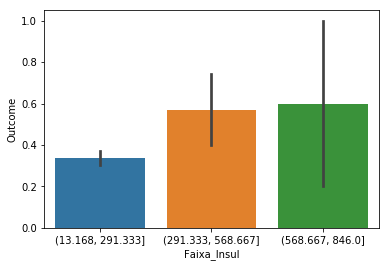

In [79]:
sns.barplot(x="Faixa_Insul", y="Outcome", data=diabetes)

In [80]:
for i in bases:    
    i.loc[ i['Insulin'] <= 291.333, 'Insulin'] = 0
    i.loc[(i['Insulin'] >291.333) & (i['Insulin'] <= 568.667), 'Insulin'] = 1
    i.loc[i['Insulin'] > 568.667,'Insulin'] = 2

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [81]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,0,0,39.9,0.569,1
73,0,1,1,0,0,35.1,0.231,0
352,0,0,1,0,0,34.4,0.243,1
497,0,1,1,0,0,30.1,0.547,0
145,0,1,1,0,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,1,1,0,34.0,0.430,1
324,0,1,1,1,0,35.7,0.148,0
624,0,1,1,0,0,30.8,0.158,0
690,1,1,1,0,0,24.6,0.856,0
473,1,2,2,0,0,29.9,0.210,1


# Análise tratamento da coluna BMI

In [82]:
diabetes['BMI'].isna().sum()

0

In [83]:
diabetes['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

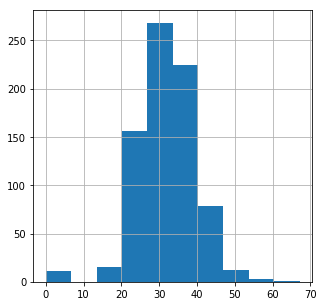

In [84]:
diabetes['BMI'].hist(figsize=(5,5))

In [85]:
diabetes['BMI'].replace(0,diabetes['BMI'].mean(),inplace=True)

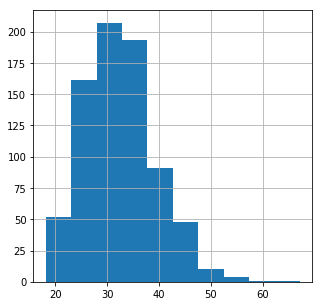

In [86]:
diabetes['BMI'].hist(figsize=(5,5))

In [87]:
diabetes['Faixa_BMI']=pd.cut(diabetes['BMI'], 4)
diabetes['Faixa_BMI']

0       (30.425, 42.65]
1      (18.151, 30.425]
2      (18.151, 30.425]
3      (18.151, 30.425]
4       (42.65, 54.875]
             ...       
763     (30.425, 42.65]
764     (30.425, 42.65]
765    (18.151, 30.425]
766    (18.151, 30.425]
767    (18.151, 30.425]
Name: Faixa_BMI, Length: 768, dtype: category
Categories (4, interval[float64]): [(18.151, 30.425] < (30.425, 42.65] < (42.65, 54.875] < (54.875, 67.1]]

In [88]:
diabetes['Faixa_BMI'].value_counts(ascending=False)

(30.425, 42.65]     394
(18.151, 30.425]    310
(42.65, 54.875]      60
(54.875, 67.1]        4
Name: Faixa_BMI, dtype: int64

In [89]:
diabetes[['Faixa_BMI','Outcome']].groupby(['Faixa_BMI'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_BMI,Outcome
3,"(54.875, 67.1]",0.750000
2,"(42.65, 54.875]",0.600000
1,"(30.425, 42.65]",0.431472
0,"(18.151, 30.425]",0.190323


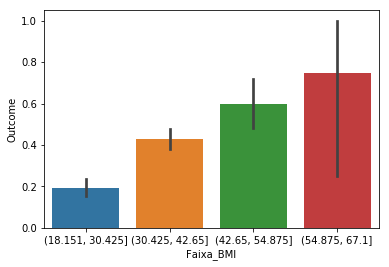

In [90]:
sns.barplot(x="Faixa_BMI", y="Outcome", data=diabetes)

In [91]:
for i in bases:    
    i.loc[ i['BMI'] <= 30.425, 'BMI'] = 0
    i.loc[(i['BMI'] >30.425) & (i['BMI'] <= 42.65), 'BMI'] = 1
    i.loc[(i['BMI'] >42.65) & (i['Glucose'] <= 54.875), 'BMI'] = 2
    i.loc[i['BMI'] > 54.875,'BMI'] = 3

In [92]:
X_treino['BMI']=X_treino['BMI'].astype(int)
X_teste['BMI']=X_teste['BMI'].astype(int)

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,0,0,1,0.569,1
73,0,1,1,0,0,1,0.231,0
352,0,0,1,0,0,1,0.243,1
497,0,1,1,0,0,0,0.547,0
145,0,1,1,0,0,0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,1,1,0,1,0.430,1
324,0,1,1,1,0,1,0.148,0
624,0,1,1,0,0,1,0.158,0
690,1,1,1,0,0,0,0.856,0
473,1,2,2,0,0,0,0.210,1


# Análise e tratamento da coluna DiabetesPedigreeFunction

In [94]:
diabetes['DiabetesPedigreeFunction'].isna().sum()

0

In [95]:
diabetes['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

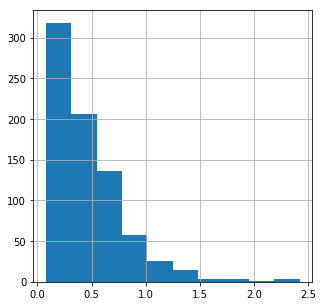

In [96]:
diabetes['DiabetesPedigreeFunction'].hist(figsize=(5,5))

In [97]:
diabetes['Faixa_DPF']=pd.cut(diabetes['DiabetesPedigreeFunction'], 4)
diabetes['Faixa_DPF']

0      (0.0757, 0.664]
1      (0.0757, 0.664]
2       (0.664, 1.249]
3      (0.0757, 0.664]
4        (1.834, 2.42]
            ...       
763    (0.0757, 0.664]
764    (0.0757, 0.664]
765    (0.0757, 0.664]
766    (0.0757, 0.664]
767    (0.0757, 0.664]
Name: Faixa_DPF, Length: 768, dtype: category
Categories (4, interval[float64]): [(0.0757, 0.664] < (0.664, 1.249] < (1.249, 1.834] < (1.834, 2.42]]

In [98]:
diabetes['Faixa_DPF'].value_counts(ascending=False)

(0.0757, 0.664]    598
(0.664, 1.249]     145
(1.249, 1.834]      20
(1.834, 2.42]        5
Name: Faixa_DPF, dtype: int64

In [99]:
diabetes[['Faixa_DPF','Outcome']].groupby(['Faixa_DPF'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_DPF,Outcome
3,"(1.834, 2.42]",0.800000
1,"(0.664, 1.249]",0.482759
2,"(1.249, 1.834]",0.450000
0,"(0.0757, 0.664]",0.309365


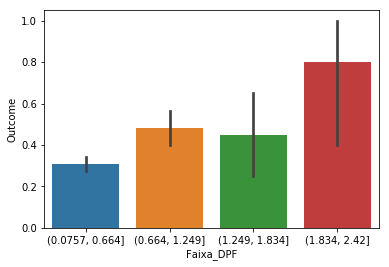

In [100]:
sns.barplot(x="Faixa_DPF", y="Outcome", data=diabetes)

In [101]:
for i in bases:    
    i.loc[ i['DiabetesPedigreeFunction'] <= 0.664, 'DiabetesPedigreeFunction'] = 0
    i.loc[(i['DiabetesPedigreeFunction'] >0.664) & (i['DiabetesPedigreeFunction'] <= 1.249), 'DiabetesPedigreeFunction'] = 1
    i.loc[(i['DiabetesPedigreeFunction'] >1.249) & (i['DiabetesPedigreeFunction'] <= 1.834), 'DiabetesPedigreeFunction'] = 2
    i.loc[i['DiabetesPedigreeFunction'] > 1.834,'DiabetesPedigreeFunction'] = 3

In [102]:
X_treino['DiabetesPedigreeFunction']=X_treino['DiabetesPedigreeFunction'].astype(int)
X_teste['DiabetesPedigreeFunction']=X_teste['DiabetesPedigreeFunction'].astype(int)

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,1,0,0,0,1,0,1
73,0,1,1,0,0,1,0,0
352,0,0,1,0,0,1,0,1
497,0,1,1,0,0,0,0,0
145,0,1,1,0,0,0,0,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,1,1,1,1,0,1,0,1
324,0,1,1,1,0,1,0,0
624,0,1,1,0,0,1,0,0
690,1,1,1,0,0,0,1,0
473,1,2,2,0,0,0,0,1


# **MODELO REGRESSÃO LOGÍSTICA**

**Instanciando o modelo de Regressão Logística**

In [104]:
diabetes_LR=LogisticRegression()

**Treinando o modelo de Regressão Logística**

In [105]:
diabetes_LR.fit(X_treino,y_treino)
import warnings
warnings.filterwarnings("ignore")

**Intercepto e coeficientes do modelo**

In [106]:
diabetes_LR.intercept_,diabetes_LR.coef_

(array([-3.80793768]),
 array([[ 0.28558368,  1.52009877,  0.00647186,  0.19597244, -0.07434733,
          0.92902102,  0.22866145,  0.42851007]]))

**Usando o modelo gerado para fazer previsões com os dados de teste**

In [107]:
diabetes_LR.predict(X_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Atribuindo dos dados de previsão e reais a outras variáveis.

In [108]:
diabetes_pred = diabetes_LR.predict(X_teste)

In [109]:
diabetes_real = y_teste

**MATRIZ DE CONFUSÃO**

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo confundiu de uma classe para outra.

In [110]:
print(pd.crosstab(diabetes_real,diabetes_pred,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0        100  23  123
1         30  39   69
All      130  62  192


A matriz de confusão mostrou que o modelo das 123 observações da que são 0 ele acertou 104 e "confunfiu" 19 como 1, já a para as 69 observações que são 1, o modelo acertou 41 e confundiu 28 como 0.

**CROSS VALIDATION**

Agora usaremos a validação cruzada que avalia a capacidade de generalização de um modelo, a partir de um conjunto de dados. Com isso iremos também obter a acurácia do modelo de regressão logística.

**Importando o módulo da Scikit-Learn**

In [111]:
from sklearn.model_selection import cross_val_predict

**Aplicando o cross validation**

In [112]:
resultados = cross_val_predict(diabetes_LR,features,classe,cv=10)

**Importando módulo Metrics**

In [113]:
from sklearn import metrics

**Obtendo a Acurácia do modelo**

In [114]:
print(metrics.accuracy_score(classe,resultados)*100)

77.34375


Como podemos ver a acurácia do modelo é de 77.34%, que a princípio é um bom nível de acurácia.

**MÉTRICAS DE AVALIAÇÃO**

A métricas de avaliação mais usadas para avaliar o modelos são a **precisão** e a **revocação**.

A **precisão** é a dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos e número de Falsos-positivos: VP/(VP+FP).

Já a **revocação** é dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos (VP) e número de Verdadeiros-negativos (VN): VP/(VP+VN).

In [115]:
resultados=cross_val_predict(diabetes_LR,features,classe,cv=10)
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados,valor_classe))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.77      0.77       768



Podemos observar que a precisão média é de 76%, sendo 79% para classe 0 e 73% para classe 1. A revocação (recall) é maior para a classe 0 (89%) e apenas 55% para a classe 1. O f1-score, que é a média harmônica entre a precisão e revocação, também é maior para classe 0 (83%) do que para a classe 1 (63%). 

# MODELO SUPPORT VECTOR MACHINE

**Instanciando o modelo SVM**

In [116]:
diabetes_SVM=svm.SVC()

diabetes_SVM.fit(X_treino,y_treino)

diabetes_SVM.predict(X_teste)

diabetes_pred2 = diabetes_SVM.predict(X_teste)

diabetes_real2 = y_teste

**MATRIZ DE CONFUSÃO**

In [117]:
print(pd.crosstab(diabetes_real2,diabetes_pred2,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0        103  20  123
1         35  34   69
All      138  54  192


**CROSS VALIDATION**

In [118]:
resultados2 = cross_val_predict(diabetes_SVM,features,classe,cv=10)

**Acurácia do modelo SVM**

In [119]:
print(metrics.accuracy_score(classe,resultados2)*100)

75.78125


**MÉTRICAS DE AVALIAÇÃO**

In [120]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados2,valor_classe))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       500
           1       0.74      0.47      0.58       268

    accuracy                           0.76       768
   macro avg       0.75      0.69      0.70       768
weighted avg       0.76      0.76      0.74       768



# CatBoost

In [121]:
from catboost import CatBoostClassifier

diabetes_cat=CatBoostClassifier().fit(X_treino,y_treino)

diabetes_cat.predict(X_teste)

diabetes_pred3 = diabetes_cat.predict(X_teste)

diabetes_real3 =y_teste

Learning rate set to 0.00814
0:	learn: 0.6892859	total: 74ms	remaining: 1m 13s
1:	learn: 0.6855657	total: 75.6ms	remaining: 37.7s
2:	learn: 0.6821555	total: 76.9ms	remaining: 25.6s
3:	learn: 0.6797979	total: 77.9ms	remaining: 19.4s
4:	learn: 0.6763909	total: 79.9ms	remaining: 15.9s
5:	learn: 0.6733181	total: 81.2ms	remaining: 13.4s
6:	learn: 0.6704812	total: 82.2ms	remaining: 11.7s
7:	learn: 0.6673729	total: 83.5ms	remaining: 10.4s
8:	learn: 0.6653318	total: 84.4ms	remaining: 9.29s
9:	learn: 0.6633263	total: 85.1ms	remaining: 8.43s
10:	learn: 0.6604378	total: 87.3ms	remaining: 7.84s
11:	learn: 0.6573117	total: 88ms	remaining: 7.24s
12:	learn: 0.6540014	total: 88.7ms	remaining: 6.74s
13:	learn: 0.6513642	total: 89.5ms	remaining: 6.31s
14:	learn: 0.6488558	total: 90.4ms	remaining: 5.94s
15:	learn: 0.6453263	total: 91.2ms	remaining: 5.61s
16:	learn: 0.6429364	total: 91.9ms	remaining: 5.31s
17:	learn: 0.6405155	total: 92.6ms	remaining: 5.05s
18:	learn: 0.6380620	total: 93.3ms	remaining: 4.

198:	learn: 0.4711140	total: 287ms	remaining: 1.15s
199:	learn: 0.4707713	total: 288ms	remaining: 1.15s
200:	learn: 0.4704696	total: 289ms	remaining: 1.15s
201:	learn: 0.4701796	total: 291ms	remaining: 1.15s
202:	learn: 0.4695958	total: 291ms	remaining: 1.14s
203:	learn: 0.4692254	total: 292ms	remaining: 1.14s
204:	learn: 0.4688727	total: 293ms	remaining: 1.14s
205:	learn: 0.4683082	total: 294ms	remaining: 1.13s
206:	learn: 0.4679971	total: 295ms	remaining: 1.13s
207:	learn: 0.4676383	total: 295ms	remaining: 1.13s
208:	learn: 0.4674902	total: 296ms	remaining: 1.12s
209:	learn: 0.4674181	total: 297ms	remaining: 1.12s
210:	learn: 0.4672825	total: 301ms	remaining: 1.13s
211:	learn: 0.4671898	total: 302ms	remaining: 1.12s
212:	learn: 0.4668989	total: 303ms	remaining: 1.12s
213:	learn: 0.4666260	total: 304ms	remaining: 1.11s
214:	learn: 0.4662782	total: 305ms	remaining: 1.11s
215:	learn: 0.4661838	total: 305ms	remaining: 1.11s
216:	learn: 0.4659855	total: 307ms	remaining: 1.11s
217:	learn: 

493:	learn: 0.4284120	total: 574ms	remaining: 588ms
494:	learn: 0.4283538	total: 575ms	remaining: 587ms
495:	learn: 0.4282377	total: 576ms	remaining: 585ms
496:	learn: 0.4281234	total: 577ms	remaining: 584ms
497:	learn: 0.4281022	total: 578ms	remaining: 582ms
498:	learn: 0.4279966	total: 578ms	remaining: 581ms
499:	learn: 0.4278454	total: 579ms	remaining: 579ms
500:	learn: 0.4277559	total: 581ms	remaining: 579ms
501:	learn: 0.4276568	total: 582ms	remaining: 578ms
502:	learn: 0.4276331	total: 583ms	remaining: 576ms
503:	learn: 0.4275565	total: 584ms	remaining: 575ms
504:	learn: 0.4274458	total: 585ms	remaining: 573ms
505:	learn: 0.4274403	total: 586ms	remaining: 572ms
506:	learn: 0.4273871	total: 587ms	remaining: 570ms
507:	learn: 0.4273129	total: 587ms	remaining: 569ms
508:	learn: 0.4272006	total: 589ms	remaining: 568ms
509:	learn: 0.4271861	total: 589ms	remaining: 566ms
510:	learn: 0.4270474	total: 590ms	remaining: 565ms
511:	learn: 0.4269641	total: 591ms	remaining: 563ms
512:	learn: 

755:	learn: 0.4091771	total: 848ms	remaining: 274ms
756:	learn: 0.4091310	total: 850ms	remaining: 273ms
757:	learn: 0.4089775	total: 851ms	remaining: 272ms
758:	learn: 0.4089205	total: 852ms	remaining: 271ms
759:	learn: 0.4087018	total: 854ms	remaining: 270ms
760:	learn: 0.4086123	total: 855ms	remaining: 269ms
761:	learn: 0.4085689	total: 856ms	remaining: 267ms
762:	learn: 0.4084382	total: 857ms	remaining: 266ms
763:	learn: 0.4083968	total: 858ms	remaining: 265ms
764:	learn: 0.4083191	total: 859ms	remaining: 264ms
765:	learn: 0.4082780	total: 860ms	remaining: 263ms
766:	learn: 0.4082000	total: 862ms	remaining: 262ms
767:	learn: 0.4081365	total: 862ms	remaining: 260ms
768:	learn: 0.4081089	total: 863ms	remaining: 259ms
769:	learn: 0.4080681	total: 864ms	remaining: 258ms
770:	learn: 0.4080214	total: 865ms	remaining: 257ms
771:	learn: 0.4079110	total: 865ms	remaining: 256ms
772:	learn: 0.4078591	total: 866ms	remaining: 254ms
773:	learn: 0.4077682	total: 867ms	remaining: 253ms
774:	learn: 

**MATRIZ DE CONFUSÃO**

In [122]:
print(pd.crosstab(diabetes_real3,diabetes_pred3,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         92  31  123
1         35  34   69
All      127  65  192


**CROSS VALIDATION**

In [123]:
resultados3 = cross_val_predict(diabetes_cat,features,classe,cv=10)

Learning rate set to 0.008798
0:	learn: 0.6880601	total: 2.48ms	remaining: 2.48s
1:	learn: 0.6842717	total: 4.85ms	remaining: 2.42s
2:	learn: 0.6801652	total: 7.08ms	remaining: 2.35s
3:	learn: 0.6755463	total: 10ms	remaining: 2.49s
4:	learn: 0.6722337	total: 13ms	remaining: 2.59s
5:	learn: 0.6674928	total: 15.1ms	remaining: 2.5s
6:	learn: 0.6634237	total: 18.3ms	remaining: 2.59s
7:	learn: 0.6599207	total: 20.7ms	remaining: 2.56s
8:	learn: 0.6553927	total: 22.8ms	remaining: 2.51s
9:	learn: 0.6523928	total: 24.7ms	remaining: 2.45s
10:	learn: 0.6482836	total: 27.7ms	remaining: 2.49s
11:	learn: 0.6448238	total: 30.9ms	remaining: 2.55s
12:	learn: 0.6409828	total: 33.1ms	remaining: 2.51s
13:	learn: 0.6372534	total: 36.1ms	remaining: 2.54s
14:	learn: 0.6335936	total: 38.4ms	remaining: 2.52s
15:	learn: 0.6305338	total: 40.1ms	remaining: 2.46s
16:	learn: 0.6271564	total: 42.5ms	remaining: 2.46s
17:	learn: 0.6241313	total: 45.6ms	remaining: 2.49s
18:	learn: 0.6203352	total: 48.7ms	remaining: 2.5

205:	learn: 0.3920005	total: 473ms	remaining: 1.82s
206:	learn: 0.3912683	total: 480ms	remaining: 1.84s
207:	learn: 0.3908397	total: 482ms	remaining: 1.83s
208:	learn: 0.3903968	total: 483ms	remaining: 1.83s
209:	learn: 0.3899527	total: 487ms	remaining: 1.83s
210:	learn: 0.3893035	total: 491ms	remaining: 1.83s
211:	learn: 0.3888284	total: 494ms	remaining: 1.83s
212:	learn: 0.3883613	total: 496ms	remaining: 1.83s
213:	learn: 0.3878145	total: 499ms	remaining: 1.83s
214:	learn: 0.3872653	total: 500ms	remaining: 1.83s
215:	learn: 0.3865614	total: 502ms	remaining: 1.82s
216:	learn: 0.3859975	total: 505ms	remaining: 1.82s
217:	learn: 0.3854779	total: 507ms	remaining: 1.82s
218:	learn: 0.3848494	total: 510ms	remaining: 1.82s
219:	learn: 0.3843681	total: 512ms	remaining: 1.81s
220:	learn: 0.3839895	total: 514ms	remaining: 1.81s
221:	learn: 0.3834341	total: 516ms	remaining: 1.81s
222:	learn: 0.3830108	total: 517ms	remaining: 1.8s
223:	learn: 0.3827196	total: 519ms	remaining: 1.8s
224:	learn: 0.

383:	learn: 0.3312431	total: 954ms	remaining: 1.53s
384:	learn: 0.3310157	total: 956ms	remaining: 1.53s
385:	learn: 0.3308350	total: 958ms	remaining: 1.52s
386:	learn: 0.3305916	total: 961ms	remaining: 1.52s
387:	learn: 0.3304061	total: 964ms	remaining: 1.52s
388:	learn: 0.3301923	total: 966ms	remaining: 1.52s
389:	learn: 0.3297818	total: 969ms	remaining: 1.51s
390:	learn: 0.3295489	total: 971ms	remaining: 1.51s
391:	learn: 0.3293163	total: 974ms	remaining: 1.51s
392:	learn: 0.3290672	total: 976ms	remaining: 1.51s
393:	learn: 0.3289295	total: 978ms	remaining: 1.5s
394:	learn: 0.3287780	total: 980ms	remaining: 1.5s
395:	learn: 0.3283996	total: 983ms	remaining: 1.5s
396:	learn: 0.3282616	total: 984ms	remaining: 1.5s
397:	learn: 0.3280639	total: 987ms	remaining: 1.49s
398:	learn: 0.3278740	total: 989ms	remaining: 1.49s
399:	learn: 0.3277319	total: 992ms	remaining: 1.49s
400:	learn: 0.3276184	total: 994ms	remaining: 1.49s
401:	learn: 0.3273700	total: 997ms	remaining: 1.48s
402:	learn: 0.32

590:	learn: 0.2860338	total: 1.43s	remaining: 989ms
591:	learn: 0.2856707	total: 1.43s	remaining: 987ms
592:	learn: 0.2855349	total: 1.43s	remaining: 984ms
593:	learn: 0.2852638	total: 1.44s	remaining: 982ms
594:	learn: 0.2850324	total: 1.44s	remaining: 979ms
595:	learn: 0.2846664	total: 1.44s	remaining: 977ms
596:	learn: 0.2845847	total: 1.44s	remaining: 975ms
597:	learn: 0.2841382	total: 1.45s	remaining: 972ms
598:	learn: 0.2839954	total: 1.45s	remaining: 969ms
599:	learn: 0.2838923	total: 1.45s	remaining: 966ms
600:	learn: 0.2837184	total: 1.45s	remaining: 965ms
601:	learn: 0.2835308	total: 1.46s	remaining: 962ms
602:	learn: 0.2834751	total: 1.46s	remaining: 959ms
603:	learn: 0.2834239	total: 1.46s	remaining: 957ms
604:	learn: 0.2832731	total: 1.46s	remaining: 955ms
605:	learn: 0.2829745	total: 1.46s	remaining: 952ms
606:	learn: 0.2828564	total: 1.47s	remaining: 950ms
607:	learn: 0.2827560	total: 1.47s	remaining: 948ms
608:	learn: 0.2826476	total: 1.47s	remaining: 945ms
609:	learn: 

766:	learn: 0.2536260	total: 1.89s	remaining: 576ms
767:	learn: 0.2533973	total: 1.9s	remaining: 573ms
768:	learn: 0.2533413	total: 1.9s	remaining: 570ms
769:	learn: 0.2531444	total: 1.9s	remaining: 568ms
770:	learn: 0.2529663	total: 1.9s	remaining: 565ms
771:	learn: 0.2528660	total: 1.91s	remaining: 563ms
772:	learn: 0.2527623	total: 1.91s	remaining: 561ms
773:	learn: 0.2526432	total: 1.91s	remaining: 558ms
774:	learn: 0.2526060	total: 1.92s	remaining: 556ms
775:	learn: 0.2525426	total: 1.92s	remaining: 554ms
776:	learn: 0.2524202	total: 1.92s	remaining: 551ms
777:	learn: 0.2522618	total: 1.92s	remaining: 549ms
778:	learn: 0.2520620	total: 1.93s	remaining: 546ms
779:	learn: 0.2518133	total: 1.93s	remaining: 544ms
780:	learn: 0.2514734	total: 1.93s	remaining: 542ms
781:	learn: 0.2514263	total: 1.93s	remaining: 539ms
782:	learn: 0.2513316	total: 1.94s	remaining: 536ms
783:	learn: 0.2511503	total: 1.94s	remaining: 534ms
784:	learn: 0.2509826	total: 1.94s	remaining: 532ms
785:	learn: 0.25

978:	learn: 0.2171094	total: 2.38s	remaining: 51ms
979:	learn: 0.2168100	total: 2.38s	remaining: 48.5ms
980:	learn: 0.2166373	total: 2.38s	remaining: 46.1ms
981:	learn: 0.2164139	total: 2.38s	remaining: 43.7ms
982:	learn: 0.2162651	total: 2.39s	remaining: 41.3ms
983:	learn: 0.2162295	total: 2.39s	remaining: 38.9ms
984:	learn: 0.2159552	total: 2.39s	remaining: 36.4ms
985:	learn: 0.2158608	total: 2.39s	remaining: 34ms
986:	learn: 0.2156636	total: 2.4s	remaining: 31.6ms
987:	learn: 0.2156002	total: 2.4s	remaining: 29.1ms
988:	learn: 0.2152143	total: 2.4s	remaining: 26.7ms
989:	learn: 0.2150414	total: 2.4s	remaining: 24.3ms
990:	learn: 0.2149010	total: 2.4s	remaining: 21.8ms
991:	learn: 0.2147256	total: 2.41s	remaining: 19.4ms
992:	learn: 0.2143870	total: 2.41s	remaining: 17ms
993:	learn: 0.2142233	total: 2.41s	remaining: 14.6ms
994:	learn: 0.2140306	total: 2.41s	remaining: 12.1ms
995:	learn: 0.2138821	total: 2.42s	remaining: 9.71ms
996:	learn: 0.2137449	total: 2.42s	remaining: 7.28ms
997:

201:	learn: 0.3931298	total: 467ms	remaining: 1.84s
202:	learn: 0.3929053	total: 469ms	remaining: 1.84s
203:	learn: 0.3922138	total: 470ms	remaining: 1.83s
204:	learn: 0.3919234	total: 472ms	remaining: 1.83s
205:	learn: 0.3914734	total: 474ms	remaining: 1.82s
206:	learn: 0.3908007	total: 476ms	remaining: 1.82s
207:	learn: 0.3904276	total: 478ms	remaining: 1.82s
208:	learn: 0.3898999	total: 479ms	remaining: 1.81s
209:	learn: 0.3894042	total: 481ms	remaining: 1.81s
210:	learn: 0.3888860	total: 483ms	remaining: 1.8s
211:	learn: 0.3885938	total: 486ms	remaining: 1.8s
212:	learn: 0.3882068	total: 488ms	remaining: 1.8s
213:	learn: 0.3877717	total: 491ms	remaining: 1.8s
214:	learn: 0.3870375	total: 494ms	remaining: 1.8s
215:	learn: 0.3866519	total: 496ms	remaining: 1.8s
216:	learn: 0.3863076	total: 499ms	remaining: 1.8s
217:	learn: 0.3858869	total: 502ms	remaining: 1.8s
218:	learn: 0.3855942	total: 505ms	remaining: 1.8s
219:	learn: 0.3851156	total: 509ms	remaining: 1.8s
220:	learn: 0.3847180	

386:	learn: 0.3322615	total: 938ms	remaining: 1.49s
387:	learn: 0.3319288	total: 941ms	remaining: 1.48s
388:	learn: 0.3316145	total: 944ms	remaining: 1.48s
389:	learn: 0.3311512	total: 947ms	remaining: 1.48s
390:	learn: 0.3309594	total: 950ms	remaining: 1.48s
391:	learn: 0.3307775	total: 952ms	remaining: 1.48s
392:	learn: 0.3304199	total: 954ms	remaining: 1.47s
393:	learn: 0.3302523	total: 956ms	remaining: 1.47s
394:	learn: 0.3300295	total: 959ms	remaining: 1.47s
395:	learn: 0.3298682	total: 963ms	remaining: 1.47s
396:	learn: 0.3295931	total: 966ms	remaining: 1.47s
397:	learn: 0.3293485	total: 969ms	remaining: 1.47s
398:	learn: 0.3291764	total: 972ms	remaining: 1.46s
399:	learn: 0.3290406	total: 974ms	remaining: 1.46s
400:	learn: 0.3288562	total: 976ms	remaining: 1.46s
401:	learn: 0.3286907	total: 978ms	remaining: 1.46s
402:	learn: 0.3285860	total: 980ms	remaining: 1.45s
403:	learn: 0.3284204	total: 982ms	remaining: 1.45s
404:	learn: 0.3280746	total: 985ms	remaining: 1.45s
405:	learn: 

573:	learn: 0.2902435	total: 1.41s	remaining: 1.05s
574:	learn: 0.2899115	total: 1.42s	remaining: 1.05s
575:	learn: 0.2897239	total: 1.42s	remaining: 1.04s
576:	learn: 0.2895418	total: 1.42s	remaining: 1.04s
577:	learn: 0.2891963	total: 1.42s	remaining: 1.04s
578:	learn: 0.2889659	total: 1.43s	remaining: 1.04s
579:	learn: 0.2887807	total: 1.43s	remaining: 1.04s
580:	learn: 0.2885702	total: 1.43s	remaining: 1.03s
581:	learn: 0.2884027	total: 1.44s	remaining: 1.03s
582:	learn: 0.2882002	total: 1.44s	remaining: 1.03s
583:	learn: 0.2879810	total: 1.44s	remaining: 1.03s
584:	learn: 0.2878464	total: 1.45s	remaining: 1.03s
585:	learn: 0.2876971	total: 1.45s	remaining: 1.02s
586:	learn: 0.2875169	total: 1.45s	remaining: 1.02s
587:	learn: 0.2873731	total: 1.46s	remaining: 1.02s
588:	learn: 0.2872818	total: 1.46s	remaining: 1.02s
589:	learn: 0.2869218	total: 1.46s	remaining: 1.02s
590:	learn: 0.2866019	total: 1.46s	remaining: 1.01s
591:	learn: 0.2862955	total: 1.47s	remaining: 1.01s
592:	learn: 

772:	learn: 0.2514668	total: 1.89s	remaining: 555ms
773:	learn: 0.2513452	total: 1.89s	remaining: 552ms
774:	learn: 0.2509731	total: 1.89s	remaining: 550ms
775:	learn: 0.2507089	total: 1.9s	remaining: 547ms
776:	learn: 0.2504549	total: 1.9s	remaining: 545ms
777:	learn: 0.2501005	total: 1.9s	remaining: 542ms
778:	learn: 0.2498433	total: 1.9s	remaining: 539ms
779:	learn: 0.2497081	total: 1.9s	remaining: 537ms
780:	learn: 0.2495552	total: 1.91s	remaining: 535ms
781:	learn: 0.2494203	total: 1.91s	remaining: 532ms
782:	learn: 0.2492896	total: 1.91s	remaining: 530ms
783:	learn: 0.2491910	total: 1.92s	remaining: 528ms
784:	learn: 0.2490084	total: 1.92s	remaining: 525ms
785:	learn: 0.2486995	total: 1.92s	remaining: 523ms
786:	learn: 0.2483288	total: 1.92s	remaining: 520ms
787:	learn: 0.2481716	total: 1.92s	remaining: 518ms
788:	learn: 0.2480430	total: 1.93s	remaining: 515ms
789:	learn: 0.2478347	total: 1.93s	remaining: 513ms
790:	learn: 0.2475879	total: 1.93s	remaining: 511ms
791:	learn: 0.247

978:	learn: 0.2177071	total: 2.37s	remaining: 50.9ms
979:	learn: 0.2174632	total: 2.38s	remaining: 48.6ms
980:	learn: 0.2173979	total: 2.38s	remaining: 46.1ms
981:	learn: 0.2172729	total: 2.38s	remaining: 43.7ms
982:	learn: 0.2171280	total: 2.39s	remaining: 41.3ms
983:	learn: 0.2169519	total: 2.39s	remaining: 38.9ms
984:	learn: 0.2168629	total: 2.4s	remaining: 36.5ms
985:	learn: 0.2165455	total: 2.4s	remaining: 34ms
986:	learn: 0.2164185	total: 2.4s	remaining: 31.6ms
987:	learn: 0.2162008	total: 2.4s	remaining: 29.2ms
988:	learn: 0.2160206	total: 2.41s	remaining: 26.8ms
989:	learn: 0.2159375	total: 2.41s	remaining: 24.3ms
990:	learn: 0.2158046	total: 2.41s	remaining: 21.9ms
991:	learn: 0.2156952	total: 2.41s	remaining: 19.5ms
992:	learn: 0.2155522	total: 2.42s	remaining: 17ms
993:	learn: 0.2154567	total: 2.42s	remaining: 14.6ms
994:	learn: 0.2151790	total: 2.42s	remaining: 12.2ms
995:	learn: 0.2149536	total: 2.42s	remaining: 9.73ms
996:	learn: 0.2148868	total: 2.42s	remaining: 7.3ms
99

172:	learn: 0.4097831	total: 491ms	remaining: 2.35s
173:	learn: 0.4094308	total: 494ms	remaining: 2.35s
174:	learn: 0.4089210	total: 496ms	remaining: 2.34s
175:	learn: 0.4084653	total: 499ms	remaining: 2.33s
176:	learn: 0.4077595	total: 502ms	remaining: 2.33s
177:	learn: 0.4071778	total: 504ms	remaining: 2.33s
178:	learn: 0.4065655	total: 507ms	remaining: 2.33s
179:	learn: 0.4058747	total: 509ms	remaining: 2.32s
180:	learn: 0.4054607	total: 512ms	remaining: 2.31s
181:	learn: 0.4047155	total: 513ms	remaining: 2.31s
182:	learn: 0.4042889	total: 515ms	remaining: 2.3s
183:	learn: 0.4036090	total: 517ms	remaining: 2.29s
184:	learn: 0.4029081	total: 519ms	remaining: 2.29s
185:	learn: 0.4022998	total: 521ms	remaining: 2.28s
186:	learn: 0.4015781	total: 522ms	remaining: 2.27s
187:	learn: 0.4010541	total: 524ms	remaining: 2.26s
188:	learn: 0.4005032	total: 526ms	remaining: 2.26s
189:	learn: 0.4000147	total: 527ms	remaining: 2.25s
190:	learn: 0.3994736	total: 529ms	remaining: 2.24s
191:	learn: 0

374:	learn: 0.3317751	total: 942ms	remaining: 1.57s
375:	learn: 0.3312926	total: 945ms	remaining: 1.57s
376:	learn: 0.3310683	total: 948ms	remaining: 1.57s
377:	learn: 0.3307330	total: 950ms	remaining: 1.56s
378:	learn: 0.3306017	total: 952ms	remaining: 1.56s
379:	learn: 0.3302698	total: 954ms	remaining: 1.56s
380:	learn: 0.3300253	total: 956ms	remaining: 1.55s
381:	learn: 0.3298690	total: 959ms	remaining: 1.55s
382:	learn: 0.3294150	total: 962ms	remaining: 1.55s
383:	learn: 0.3290917	total: 964ms	remaining: 1.54s
384:	learn: 0.3287883	total: 967ms	remaining: 1.54s
385:	learn: 0.3286272	total: 969ms	remaining: 1.54s
386:	learn: 0.3282453	total: 972ms	remaining: 1.54s
387:	learn: 0.3280044	total: 974ms	remaining: 1.54s
388:	learn: 0.3277055	total: 976ms	remaining: 1.53s
389:	learn: 0.3274194	total: 979ms	remaining: 1.53s
390:	learn: 0.3273134	total: 981ms	remaining: 1.53s
391:	learn: 0.3270977	total: 984ms	remaining: 1.53s
392:	learn: 0.3267463	total: 986ms	remaining: 1.52s
393:	learn: 

566:	learn: 0.2872082	total: 1.42s	remaining: 1.09s
567:	learn: 0.2870551	total: 1.43s	remaining: 1.08s
568:	learn: 0.2867101	total: 1.43s	remaining: 1.08s
569:	learn: 0.2863970	total: 1.43s	remaining: 1.08s
570:	learn: 0.2861723	total: 1.43s	remaining: 1.08s
571:	learn: 0.2858570	total: 1.44s	remaining: 1.07s
572:	learn: 0.2855613	total: 1.44s	remaining: 1.07s
573:	learn: 0.2853208	total: 1.44s	remaining: 1.07s
574:	learn: 0.2849749	total: 1.44s	remaining: 1.06s
575:	learn: 0.2848436	total: 1.44s	remaining: 1.06s
576:	learn: 0.2846142	total: 1.45s	remaining: 1.06s
577:	learn: 0.2842073	total: 1.45s	remaining: 1.06s
578:	learn: 0.2840847	total: 1.45s	remaining: 1.05s
579:	learn: 0.2839094	total: 1.45s	remaining: 1.05s
580:	learn: 0.2836002	total: 1.45s	remaining: 1.05s
581:	learn: 0.2835394	total: 1.46s	remaining: 1.05s
582:	learn: 0.2832657	total: 1.46s	remaining: 1.04s
583:	learn: 0.2831289	total: 1.46s	remaining: 1.04s
584:	learn: 0.2830328	total: 1.46s	remaining: 1.04s
585:	learn: 

787:	learn: 0.2439430	total: 1.9s	remaining: 512ms
788:	learn: 0.2438131	total: 1.9s	remaining: 509ms
789:	learn: 0.2435033	total: 1.91s	remaining: 507ms
790:	learn: 0.2433376	total: 1.91s	remaining: 504ms
791:	learn: 0.2431997	total: 1.91s	remaining: 502ms
792:	learn: 0.2431047	total: 1.91s	remaining: 499ms
793:	learn: 0.2429265	total: 1.92s	remaining: 497ms
794:	learn: 0.2428066	total: 1.92s	remaining: 495ms
795:	learn: 0.2426567	total: 1.92s	remaining: 492ms
796:	learn: 0.2423379	total: 1.92s	remaining: 490ms
797:	learn: 0.2422260	total: 1.92s	remaining: 487ms
798:	learn: 0.2420156	total: 1.93s	remaining: 485ms
799:	learn: 0.2417072	total: 1.93s	remaining: 482ms
800:	learn: 0.2415191	total: 1.93s	remaining: 480ms
801:	learn: 0.2413295	total: 1.93s	remaining: 477ms
802:	learn: 0.2410748	total: 1.93s	remaining: 475ms
803:	learn: 0.2409470	total: 1.94s	remaining: 472ms
804:	learn: 0.2407706	total: 1.94s	remaining: 469ms
805:	learn: 0.2405717	total: 1.94s	remaining: 467ms
806:	learn: 0.

987:	learn: 0.2112567	total: 2.38s	remaining: 28.9ms
988:	learn: 0.2111254	total: 2.38s	remaining: 26.5ms
989:	learn: 0.2110679	total: 2.38s	remaining: 24.1ms
990:	learn: 0.2108732	total: 2.38s	remaining: 21.7ms
991:	learn: 0.2107035	total: 2.39s	remaining: 19.3ms
992:	learn: 0.2105612	total: 2.39s	remaining: 16.9ms
993:	learn: 0.2104249	total: 2.39s	remaining: 14.4ms
994:	learn: 0.2102463	total: 2.4s	remaining: 12ms
995:	learn: 0.2099653	total: 2.4s	remaining: 9.63ms
996:	learn: 0.2097184	total: 2.4s	remaining: 7.22ms
997:	learn: 0.2096470	total: 2.4s	remaining: 4.81ms
998:	learn: 0.2095860	total: 2.4s	remaining: 2.41ms
999:	learn: 0.2093454	total: 2.41s	remaining: 0us
Learning rate set to 0.008798
0:	learn: 0.6877095	total: 2.92ms	remaining: 2.92s
1:	learn: 0.6845543	total: 6.22ms	remaining: 3.1s
2:	learn: 0.6799329	total: 8.23ms	remaining: 2.73s
3:	learn: 0.6749628	total: 10.8ms	remaining: 2.68s
4:	learn: 0.6713086	total: 13.5ms	remaining: 2.68s
5:	learn: 0.6666710	total: 15.7ms	rem

200:	learn: 0.3876112	total: 482ms	remaining: 1.92s
201:	learn: 0.3870785	total: 484ms	remaining: 1.91s
202:	learn: 0.3867698	total: 486ms	remaining: 1.91s
203:	learn: 0.3864479	total: 488ms	remaining: 1.9s
204:	learn: 0.3857588	total: 489ms	remaining: 1.9s
205:	learn: 0.3853275	total: 491ms	remaining: 1.89s
206:	learn: 0.3847848	total: 494ms	remaining: 1.89s
207:	learn: 0.3844162	total: 496ms	remaining: 1.89s
208:	learn: 0.3837562	total: 499ms	remaining: 1.89s
209:	learn: 0.3833112	total: 501ms	remaining: 1.88s
210:	learn: 0.3831059	total: 504ms	remaining: 1.88s
211:	learn: 0.3825391	total: 505ms	remaining: 1.88s
212:	learn: 0.3820871	total: 508ms	remaining: 1.88s
213:	learn: 0.3815017	total: 510ms	remaining: 1.87s
214:	learn: 0.3808796	total: 511ms	remaining: 1.86s
215:	learn: 0.3804641	total: 513ms	remaining: 1.86s
216:	learn: 0.3798674	total: 514ms	remaining: 1.86s
217:	learn: 0.3794692	total: 517ms	remaining: 1.85s
218:	learn: 0.3790470	total: 520ms	remaining: 1.85s
219:	learn: 0.

418:	learn: 0.3195249	total: 961ms	remaining: 1.33s
419:	learn: 0.3193775	total: 963ms	remaining: 1.33s
420:	learn: 0.3192650	total: 965ms	remaining: 1.33s
421:	learn: 0.3191537	total: 966ms	remaining: 1.32s
422:	learn: 0.3187511	total: 968ms	remaining: 1.32s
423:	learn: 0.3184348	total: 970ms	remaining: 1.32s
424:	learn: 0.3182400	total: 971ms	remaining: 1.31s
425:	learn: 0.3180193	total: 974ms	remaining: 1.31s
426:	learn: 0.3178558	total: 976ms	remaining: 1.31s
427:	learn: 0.3176535	total: 978ms	remaining: 1.31s
428:	learn: 0.3174513	total: 979ms	remaining: 1.3s
429:	learn: 0.3172148	total: 982ms	remaining: 1.3s
430:	learn: 0.3170447	total: 984ms	remaining: 1.3s
431:	learn: 0.3169377	total: 986ms	remaining: 1.3s
432:	learn: 0.3167472	total: 988ms	remaining: 1.29s
433:	learn: 0.3164900	total: 992ms	remaining: 1.29s
434:	learn: 0.3162621	total: 994ms	remaining: 1.29s
435:	learn: 0.3160230	total: 997ms	remaining: 1.29s
436:	learn: 0.3158629	total: 1000ms	remaining: 1.29s
437:	learn: 0.3

623:	learn: 0.2766140	total: 1.44s	remaining: 870ms
624:	learn: 0.2764494	total: 1.45s	remaining: 867ms
625:	learn: 0.2763658	total: 1.45s	remaining: 865ms
626:	learn: 0.2761261	total: 1.45s	remaining: 862ms
627:	learn: 0.2759772	total: 1.45s	remaining: 859ms
628:	learn: 0.2756656	total: 1.45s	remaining: 857ms
629:	learn: 0.2754310	total: 1.45s	remaining: 854ms
630:	learn: 0.2753813	total: 1.46s	remaining: 851ms
631:	learn: 0.2750495	total: 1.46s	remaining: 849ms
632:	learn: 0.2748582	total: 1.46s	remaining: 847ms
633:	learn: 0.2746590	total: 1.46s	remaining: 845ms
634:	learn: 0.2744822	total: 1.47s	remaining: 842ms
635:	learn: 0.2742656	total: 1.47s	remaining: 840ms
636:	learn: 0.2740399	total: 1.47s	remaining: 838ms
637:	learn: 0.2739278	total: 1.47s	remaining: 836ms
638:	learn: 0.2737802	total: 1.48s	remaining: 835ms
639:	learn: 0.2736197	total: 1.48s	remaining: 832ms
640:	learn: 0.2733176	total: 1.48s	remaining: 830ms
641:	learn: 0.2731969	total: 1.48s	remaining: 828ms
642:	learn: 

839:	learn: 0.2378399	total: 1.92s	remaining: 366ms
840:	learn: 0.2377268	total: 1.92s	remaining: 364ms
841:	learn: 0.2375991	total: 1.93s	remaining: 362ms
842:	learn: 0.2373652	total: 1.93s	remaining: 359ms
843:	learn: 0.2372438	total: 1.93s	remaining: 357ms
844:	learn: 0.2371371	total: 1.93s	remaining: 355ms
845:	learn: 0.2370138	total: 1.94s	remaining: 352ms
846:	learn: 0.2367490	total: 1.94s	remaining: 350ms
847:	learn: 0.2367099	total: 1.94s	remaining: 348ms
848:	learn: 0.2366008	total: 1.94s	remaining: 346ms
849:	learn: 0.2364867	total: 1.95s	remaining: 343ms
850:	learn: 0.2363391	total: 1.95s	remaining: 341ms
851:	learn: 0.2361201	total: 1.95s	remaining: 339ms
852:	learn: 0.2359533	total: 1.95s	remaining: 336ms
853:	learn: 0.2358027	total: 1.95s	remaining: 334ms
854:	learn: 0.2355908	total: 1.96s	remaining: 332ms
855:	learn: 0.2353802	total: 1.96s	remaining: 329ms
856:	learn: 0.2352162	total: 1.96s	remaining: 327ms
857:	learn: 0.2349689	total: 1.96s	remaining: 325ms
858:	learn: 

Learning rate set to 0.008798
0:	learn: 0.6877893	total: 3.14ms	remaining: 3.14s
1:	learn: 0.6834899	total: 5.26ms	remaining: 2.63s
2:	learn: 0.6791864	total: 7.19ms	remaining: 2.39s
3:	learn: 0.6746349	total: 9.52ms	remaining: 2.37s
4:	learn: 0.6712574	total: 12.5ms	remaining: 2.49s
5:	learn: 0.6675089	total: 14.8ms	remaining: 2.45s
6:	learn: 0.6636401	total: 17.8ms	remaining: 2.52s
7:	learn: 0.6600100	total: 20.9ms	remaining: 2.59s
8:	learn: 0.6557099	total: 22.8ms	remaining: 2.51s
9:	learn: 0.6521797	total: 25ms	remaining: 2.48s
10:	learn: 0.6479887	total: 28.1ms	remaining: 2.52s
11:	learn: 0.6444448	total: 30.8ms	remaining: 2.54s
12:	learn: 0.6408600	total: 32.9ms	remaining: 2.5s
13:	learn: 0.6364244	total: 35.9ms	remaining: 2.53s
14:	learn: 0.6322759	total: 38.6ms	remaining: 2.53s
15:	learn: 0.6282808	total: 41ms	remaining: 2.52s
16:	learn: 0.6249533	total: 43.8ms	remaining: 2.53s
17:	learn: 0.6222779	total: 45.8ms	remaining: 2.5s
18:	learn: 0.6186150	total: 48.7ms	remaining: 2.52

193:	learn: 0.3981352	total: 481ms	remaining: 2s
194:	learn: 0.3976454	total: 484ms	remaining: 2s
195:	learn: 0.3973068	total: 485ms	remaining: 1.99s
196:	learn: 0.3969612	total: 487ms	remaining: 1.98s
197:	learn: 0.3963387	total: 489ms	remaining: 1.98s
198:	learn: 0.3958072	total: 492ms	remaining: 1.98s
199:	learn: 0.3954326	total: 495ms	remaining: 1.98s
200:	learn: 0.3948395	total: 497ms	remaining: 1.98s
201:	learn: 0.3942510	total: 500ms	remaining: 1.97s
202:	learn: 0.3940314	total: 502ms	remaining: 1.97s
203:	learn: 0.3935223	total: 504ms	remaining: 1.97s
204:	learn: 0.3929443	total: 506ms	remaining: 1.96s
205:	learn: 0.3923448	total: 509ms	remaining: 1.96s
206:	learn: 0.3916056	total: 511ms	remaining: 1.96s
207:	learn: 0.3912575	total: 514ms	remaining: 1.96s
208:	learn: 0.3907762	total: 516ms	remaining: 1.95s
209:	learn: 0.3902929	total: 518ms	remaining: 1.95s
210:	learn: 0.3898656	total: 519ms	remaining: 1.94s
211:	learn: 0.3893750	total: 522ms	remaining: 1.94s
212:	learn: 0.3889

417:	learn: 0.3234657	total: 964ms	remaining: 1.34s
418:	learn: 0.3232098	total: 966ms	remaining: 1.34s
419:	learn: 0.3229228	total: 968ms	remaining: 1.34s
420:	learn: 0.3226095	total: 970ms	remaining: 1.33s
421:	learn: 0.3224468	total: 972ms	remaining: 1.33s
422:	learn: 0.3222628	total: 975ms	remaining: 1.33s
423:	learn: 0.3220802	total: 977ms	remaining: 1.33s
424:	learn: 0.3218907	total: 980ms	remaining: 1.33s
425:	learn: 0.3217381	total: 982ms	remaining: 1.32s
426:	learn: 0.3212070	total: 984ms	remaining: 1.32s
427:	learn: 0.3210337	total: 986ms	remaining: 1.32s
428:	learn: 0.3207708	total: 989ms	remaining: 1.31s
429:	learn: 0.3206366	total: 991ms	remaining: 1.31s
430:	learn: 0.3203500	total: 993ms	remaining: 1.31s
431:	learn: 0.3201704	total: 995ms	remaining: 1.31s
432:	learn: 0.3198457	total: 997ms	remaining: 1.3s
433:	learn: 0.3197609	total: 1000ms	remaining: 1.3s
434:	learn: 0.3194913	total: 1s	remaining: 1.3s
435:	learn: 0.3192383	total: 1.01s	remaining: 1.3s
436:	learn: 0.3190

621:	learn: 0.2797419	total: 1.45s	remaining: 880ms
622:	learn: 0.2795397	total: 1.45s	remaining: 877ms
623:	learn: 0.2793887	total: 1.45s	remaining: 875ms
624:	learn: 0.2792573	total: 1.45s	remaining: 873ms
625:	learn: 0.2791619	total: 1.46s	remaining: 871ms
626:	learn: 0.2789819	total: 1.46s	remaining: 868ms
627:	learn: 0.2787869	total: 1.46s	remaining: 865ms
628:	learn: 0.2786288	total: 1.46s	remaining: 863ms
629:	learn: 0.2784721	total: 1.47s	remaining: 861ms
630:	learn: 0.2784292	total: 1.47s	remaining: 859ms
631:	learn: 0.2783271	total: 1.47s	remaining: 856ms
632:	learn: 0.2780510	total: 1.47s	remaining: 854ms
633:	learn: 0.2778660	total: 1.48s	remaining: 852ms
634:	learn: 0.2775430	total: 1.48s	remaining: 849ms
635:	learn: 0.2773765	total: 1.48s	remaining: 847ms
636:	learn: 0.2771255	total: 1.48s	remaining: 845ms
637:	learn: 0.2769632	total: 1.48s	remaining: 842ms
638:	learn: 0.2767664	total: 1.49s	remaining: 839ms
639:	learn: 0.2767296	total: 1.49s	remaining: 838ms
640:	learn: 

841:	learn: 0.2385914	total: 1.93s	remaining: 361ms
842:	learn: 0.2384778	total: 1.93s	remaining: 359ms
843:	learn: 0.2383306	total: 1.93s	remaining: 357ms
844:	learn: 0.2381708	total: 1.93s	remaining: 354ms
845:	learn: 0.2379967	total: 1.93s	remaining: 352ms
846:	learn: 0.2377325	total: 1.94s	remaining: 350ms
847:	learn: 0.2376256	total: 1.94s	remaining: 347ms
848:	learn: 0.2374579	total: 1.94s	remaining: 345ms
849:	learn: 0.2373523	total: 1.94s	remaining: 343ms
850:	learn: 0.2370862	total: 1.94s	remaining: 340ms
851:	learn: 0.2369021	total: 1.95s	remaining: 338ms
852:	learn: 0.2365315	total: 1.95s	remaining: 336ms
853:	learn: 0.2363582	total: 1.95s	remaining: 334ms
854:	learn: 0.2361886	total: 1.95s	remaining: 331ms
855:	learn: 0.2360809	total: 1.96s	remaining: 329ms
856:	learn: 0.2359031	total: 1.96s	remaining: 327ms
857:	learn: 0.2357569	total: 1.96s	remaining: 324ms
858:	learn: 0.2355574	total: 1.96s	remaining: 322ms
859:	learn: 0.2354761	total: 1.96s	remaining: 320ms
860:	learn: 

Learning rate set to 0.008798
0:	learn: 0.6889231	total: 2.38ms	remaining: 2.38s
1:	learn: 0.6847252	total: 4.49ms	remaining: 2.24s
2:	learn: 0.6808175	total: 7.78ms	remaining: 2.58s
3:	learn: 0.6768992	total: 9.7ms	remaining: 2.42s
4:	learn: 0.6727692	total: 12.5ms	remaining: 2.49s
5:	learn: 0.6689617	total: 15.3ms	remaining: 2.53s
6:	learn: 0.6650562	total: 18ms	remaining: 2.55s
7:	learn: 0.6614143	total: 20ms	remaining: 2.48s
8:	learn: 0.6574158	total: 22.3ms	remaining: 2.45s
9:	learn: 0.6541162	total: 25.2ms	remaining: 2.49s
10:	learn: 0.6502620	total: 27.3ms	remaining: 2.46s
11:	learn: 0.6470618	total: 30.2ms	remaining: 2.49s
12:	learn: 0.6437691	total: 33.1ms	remaining: 2.51s
13:	learn: 0.6395512	total: 35.3ms	remaining: 2.49s
14:	learn: 0.6361568	total: 37.2ms	remaining: 2.44s
15:	learn: 0.6321021	total: 39.8ms	remaining: 2.45s
16:	learn: 0.6280134	total: 42.3ms	remaining: 2.45s
17:	learn: 0.6255574	total: 44.8ms	remaining: 2.44s
18:	learn: 0.6219287	total: 47.4ms	remaining: 2.4

201:	learn: 0.3982699	total: 480ms	remaining: 1.9s
202:	learn: 0.3979869	total: 482ms	remaining: 1.89s
203:	learn: 0.3973775	total: 483ms	remaining: 1.88s
204:	learn: 0.3968785	total: 485ms	remaining: 1.88s
205:	learn: 0.3964152	total: 486ms	remaining: 1.87s
206:	learn: 0.3957431	total: 488ms	remaining: 1.87s
207:	learn: 0.3953711	total: 490ms	remaining: 1.87s
208:	learn: 0.3947327	total: 492ms	remaining: 1.86s
209:	learn: 0.3942735	total: 495ms	remaining: 1.86s
210:	learn: 0.3937365	total: 498ms	remaining: 1.86s
211:	learn: 0.3931956	total: 501ms	remaining: 1.86s
212:	learn: 0.3928074	total: 502ms	remaining: 1.85s
213:	learn: 0.3921934	total: 504ms	remaining: 1.85s
214:	learn: 0.3915340	total: 506ms	remaining: 1.85s
215:	learn: 0.3911569	total: 508ms	remaining: 1.84s
216:	learn: 0.3906219	total: 510ms	remaining: 1.84s
217:	learn: 0.3901920	total: 512ms	remaining: 1.84s
218:	learn: 0.3898269	total: 514ms	remaining: 1.83s
219:	learn: 0.3894007	total: 517ms	remaining: 1.83s
220:	learn: 0

413:	learn: 0.3284841	total: 966ms	remaining: 1.37s
414:	learn: 0.3282984	total: 968ms	remaining: 1.36s
415:	learn: 0.3281969	total: 971ms	remaining: 1.36s
416:	learn: 0.3280293	total: 973ms	remaining: 1.36s
417:	learn: 0.3277288	total: 976ms	remaining: 1.36s
418:	learn: 0.3275120	total: 979ms	remaining: 1.36s
419:	learn: 0.3273559	total: 981ms	remaining: 1.35s
420:	learn: 0.3271910	total: 983ms	remaining: 1.35s
421:	learn: 0.3270963	total: 986ms	remaining: 1.35s
422:	learn: 0.3268615	total: 989ms	remaining: 1.35s
423:	learn: 0.3266019	total: 991ms	remaining: 1.34s
424:	learn: 0.3263680	total: 994ms	remaining: 1.34s
425:	learn: 0.3261361	total: 997ms	remaining: 1.34s
426:	learn: 0.3259279	total: 999ms	remaining: 1.34s
427:	learn: 0.3257296	total: 1s	remaining: 1.34s
428:	learn: 0.3254340	total: 1s	remaining: 1.34s
429:	learn: 0.3253178	total: 1.01s	remaining: 1.33s
430:	learn: 0.3250592	total: 1.01s	remaining: 1.33s
431:	learn: 0.3249395	total: 1.01s	remaining: 1.33s
432:	learn: 0.3246

633:	learn: 0.2829572	total: 1.45s	remaining: 835ms
634:	learn: 0.2828513	total: 1.45s	remaining: 833ms
635:	learn: 0.2827510	total: 1.45s	remaining: 830ms
636:	learn: 0.2826194	total: 1.45s	remaining: 828ms
637:	learn: 0.2823606	total: 1.46s	remaining: 826ms
638:	learn: 0.2823159	total: 1.46s	remaining: 823ms
639:	learn: 0.2821560	total: 1.46s	remaining: 821ms
640:	learn: 0.2820625	total: 1.46s	remaining: 819ms
641:	learn: 0.2818967	total: 1.46s	remaining: 816ms
642:	learn: 0.2815567	total: 1.47s	remaining: 814ms
643:	learn: 0.2813657	total: 1.47s	remaining: 811ms
644:	learn: 0.2811452	total: 1.47s	remaining: 809ms
645:	learn: 0.2811022	total: 1.47s	remaining: 806ms
646:	learn: 0.2809101	total: 1.47s	remaining: 804ms
647:	learn: 0.2806978	total: 1.48s	remaining: 802ms
648:	learn: 0.2805281	total: 1.48s	remaining: 799ms
649:	learn: 0.2804348	total: 1.48s	remaining: 797ms
650:	learn: 0.2803422	total: 1.48s	remaining: 795ms
651:	learn: 0.2801963	total: 1.48s	remaining: 792ms
652:	learn: 

843:	learn: 0.2475908	total: 1.93s	remaining: 357ms
844:	learn: 0.2474876	total: 1.93s	remaining: 355ms
845:	learn: 0.2473089	total: 1.94s	remaining: 352ms
846:	learn: 0.2471180	total: 1.94s	remaining: 350ms
847:	learn: 0.2469705	total: 1.94s	remaining: 348ms
848:	learn: 0.2468603	total: 1.94s	remaining: 345ms
849:	learn: 0.2467189	total: 1.94s	remaining: 343ms
850:	learn: 0.2465709	total: 1.95s	remaining: 341ms
851:	learn: 0.2464488	total: 1.95s	remaining: 339ms
852:	learn: 0.2463680	total: 1.95s	remaining: 336ms
853:	learn: 0.2462150	total: 1.95s	remaining: 334ms
854:	learn: 0.2460590	total: 1.96s	remaining: 332ms
855:	learn: 0.2460074	total: 1.96s	remaining: 330ms
856:	learn: 0.2458258	total: 1.96s	remaining: 327ms
857:	learn: 0.2455635	total: 1.96s	remaining: 325ms
858:	learn: 0.2454386	total: 1.97s	remaining: 323ms
859:	learn: 0.2451227	total: 1.97s	remaining: 320ms
860:	learn: 0.2450389	total: 1.97s	remaining: 318ms
861:	learn: 0.2448923	total: 1.97s	remaining: 316ms
862:	learn: 

59:	learn: 0.5250159	total: 154ms	remaining: 2.42s
60:	learn: 0.5234680	total: 156ms	remaining: 2.41s
61:	learn: 0.5216491	total: 158ms	remaining: 2.4s
62:	learn: 0.5201117	total: 161ms	remaining: 2.4s
63:	learn: 0.5179194	total: 164ms	remaining: 2.39s
64:	learn: 0.5162612	total: 166ms	remaining: 2.39s
65:	learn: 0.5145475	total: 168ms	remaining: 2.38s
66:	learn: 0.5126299	total: 171ms	remaining: 2.38s
67:	learn: 0.5109834	total: 174ms	remaining: 2.38s
68:	learn: 0.5097530	total: 176ms	remaining: 2.38s
69:	learn: 0.5082479	total: 179ms	remaining: 2.38s
70:	learn: 0.5064567	total: 182ms	remaining: 2.37s
71:	learn: 0.5052800	total: 184ms	remaining: 2.37s
72:	learn: 0.5040720	total: 186ms	remaining: 2.36s
73:	learn: 0.5029278	total: 189ms	remaining: 2.36s
74:	learn: 0.5014880	total: 191ms	remaining: 2.36s
75:	learn: 0.5004216	total: 194ms	remaining: 2.36s
76:	learn: 0.4987109	total: 196ms	remaining: 2.35s
77:	learn: 0.4973843	total: 199ms	remaining: 2.35s
78:	learn: 0.4963558	total: 202ms

271:	learn: 0.3732247	total: 636ms	remaining: 1.7s
272:	learn: 0.3728259	total: 638ms	remaining: 1.7s
273:	learn: 0.3722004	total: 640ms	remaining: 1.7s
274:	learn: 0.3718041	total: 642ms	remaining: 1.69s
275:	learn: 0.3715267	total: 645ms	remaining: 1.69s
276:	learn: 0.3710936	total: 647ms	remaining: 1.69s
277:	learn: 0.3705447	total: 649ms	remaining: 1.69s
278:	learn: 0.3701946	total: 651ms	remaining: 1.68s
279:	learn: 0.3697477	total: 654ms	remaining: 1.68s
280:	learn: 0.3693906	total: 655ms	remaining: 1.68s
281:	learn: 0.3690889	total: 658ms	remaining: 1.67s
282:	learn: 0.3687281	total: 659ms	remaining: 1.67s
283:	learn: 0.3685138	total: 662ms	remaining: 1.67s
284:	learn: 0.3681604	total: 664ms	remaining: 1.67s
285:	learn: 0.3679074	total: 666ms	remaining: 1.66s
286:	learn: 0.3676980	total: 668ms	remaining: 1.66s
287:	learn: 0.3672910	total: 670ms	remaining: 1.66s
288:	learn: 0.3671153	total: 672ms	remaining: 1.65s
289:	learn: 0.3667149	total: 675ms	remaining: 1.65s
290:	learn: 0.3

481:	learn: 0.3155302	total: 1.11s	remaining: 1.2s
482:	learn: 0.3153357	total: 1.11s	remaining: 1.19s
483:	learn: 0.3152114	total: 1.12s	remaining: 1.19s
484:	learn: 0.3150450	total: 1.12s	remaining: 1.19s
485:	learn: 0.3148453	total: 1.12s	remaining: 1.18s
486:	learn: 0.3146324	total: 1.12s	remaining: 1.18s
487:	learn: 0.3144068	total: 1.12s	remaining: 1.18s
488:	learn: 0.3141244	total: 1.13s	remaining: 1.18s
489:	learn: 0.3138818	total: 1.13s	remaining: 1.17s
490:	learn: 0.3136548	total: 1.13s	remaining: 1.17s
491:	learn: 0.3134105	total: 1.13s	remaining: 1.17s
492:	learn: 0.3132720	total: 1.14s	remaining: 1.17s
493:	learn: 0.3130700	total: 1.14s	remaining: 1.17s
494:	learn: 0.3129168	total: 1.14s	remaining: 1.17s
495:	learn: 0.3127129	total: 1.14s	remaining: 1.16s
496:	learn: 0.3125586	total: 1.15s	remaining: 1.16s
497:	learn: 0.3123818	total: 1.15s	remaining: 1.16s
498:	learn: 0.3120909	total: 1.15s	remaining: 1.16s
499:	learn: 0.3116830	total: 1.15s	remaining: 1.15s
500:	learn: 0

645:	learn: 0.2837515	total: 1.57s	remaining: 863ms
646:	learn: 0.2836216	total: 1.58s	remaining: 861ms
647:	learn: 0.2834811	total: 1.58s	remaining: 858ms
648:	learn: 0.2833859	total: 1.58s	remaining: 855ms
649:	learn: 0.2832271	total: 1.58s	remaining: 853ms
650:	learn: 0.2830325	total: 1.58s	remaining: 850ms
651:	learn: 0.2829448	total: 1.59s	remaining: 847ms
652:	learn: 0.2827311	total: 1.59s	remaining: 845ms
653:	learn: 0.2825755	total: 1.59s	remaining: 843ms
654:	learn: 0.2823859	total: 1.59s	remaining: 840ms
655:	learn: 0.2822489	total: 1.6s	remaining: 838ms
656:	learn: 0.2820177	total: 1.6s	remaining: 835ms
657:	learn: 0.2817712	total: 1.6s	remaining: 834ms
658:	learn: 0.2815126	total: 1.61s	remaining: 832ms
659:	learn: 0.2813427	total: 1.61s	remaining: 829ms
660:	learn: 0.2810592	total: 1.61s	remaining: 827ms
661:	learn: 0.2809810	total: 1.61s	remaining: 825ms
662:	learn: 0.2807974	total: 1.62s	remaining: 822ms
663:	learn: 0.2807300	total: 1.62s	remaining: 819ms
664:	learn: 0.2

819:	learn: 0.2541463	total: 2.04s	remaining: 448ms
820:	learn: 0.2539139	total: 2.04s	remaining: 445ms
821:	learn: 0.2537193	total: 2.04s	remaining: 443ms
822:	learn: 0.2536572	total: 2.05s	remaining: 440ms
823:	learn: 0.2534326	total: 2.05s	remaining: 438ms
824:	learn: 0.2532040	total: 2.05s	remaining: 435ms
825:	learn: 0.2531383	total: 2.05s	remaining: 432ms
826:	learn: 0.2530755	total: 2.05s	remaining: 430ms
827:	learn: 0.2530257	total: 2.06s	remaining: 427ms
828:	learn: 0.2528709	total: 2.06s	remaining: 425ms
829:	learn: 0.2527329	total: 2.06s	remaining: 422ms
830:	learn: 0.2525067	total: 2.06s	remaining: 419ms
831:	learn: 0.2523459	total: 2.06s	remaining: 417ms
832:	learn: 0.2522512	total: 2.06s	remaining: 414ms
833:	learn: 0.2519201	total: 2.07s	remaining: 411ms
834:	learn: 0.2517871	total: 2.07s	remaining: 409ms
835:	learn: 0.2516712	total: 2.07s	remaining: 406ms
836:	learn: 0.2514578	total: 2.07s	remaining: 404ms
837:	learn: 0.2512285	total: 2.08s	remaining: 401ms
838:	learn: 

Learning rate set to 0.008798
0:	learn: 0.6885567	total: 2.75ms	remaining: 2.75s
1:	learn: 0.6845772	total: 5.5ms	remaining: 2.74s
2:	learn: 0.6810685	total: 7.79ms	remaining: 2.59s
3:	learn: 0.6774038	total: 10.1ms	remaining: 2.52s
4:	learn: 0.6742915	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6708294	total: 15.3ms	remaining: 2.54s
6:	learn: 0.6669076	total: 18.4ms	remaining: 2.61s
7:	learn: 0.6630928	total: 21.6ms	remaining: 2.68s
8:	learn: 0.6590131	total: 24ms	remaining: 2.65s
9:	learn: 0.6555572	total: 27.2ms	remaining: 2.69s
10:	learn: 0.6516455	total: 29.6ms	remaining: 2.66s
11:	learn: 0.6477957	total: 31.9ms	remaining: 2.62s
12:	learn: 0.6445464	total: 33.8ms	remaining: 2.56s
13:	learn: 0.6409263	total: 36.5ms	remaining: 2.57s
14:	learn: 0.6373166	total: 39.3ms	remaining: 2.58s
15:	learn: 0.6339326	total: 41.4ms	remaining: 2.54s
16:	learn: 0.6306404	total: 44.2ms	remaining: 2.56s
17:	learn: 0.6279424	total: 47.5ms	remaining: 2.59s
18:	learn: 0.6252680	total: 50.4ms	remaining: 2

176:	learn: 0.4209062	total: 467ms	remaining: 2.17s
177:	learn: 0.4205764	total: 468ms	remaining: 2.16s
178:	learn: 0.4199626	total: 475ms	remaining: 2.18s
179:	learn: 0.4195205	total: 477ms	remaining: 2.17s
180:	learn: 0.4189781	total: 481ms	remaining: 2.17s
181:	learn: 0.4184310	total: 483ms	remaining: 2.17s
182:	learn: 0.4178914	total: 486ms	remaining: 2.17s
183:	learn: 0.4170075	total: 489ms	remaining: 2.17s
184:	learn: 0.4163363	total: 492ms	remaining: 2.17s
185:	learn: 0.4156772	total: 494ms	remaining: 2.16s
186:	learn: 0.4149631	total: 496ms	remaining: 2.15s
187:	learn: 0.4144401	total: 497ms	remaining: 2.15s
188:	learn: 0.4140017	total: 499ms	remaining: 2.14s
189:	learn: 0.4135457	total: 501ms	remaining: 2.13s
190:	learn: 0.4128697	total: 503ms	remaining: 2.13s
191:	learn: 0.4124224	total: 507ms	remaining: 2.13s
192:	learn: 0.4117247	total: 510ms	remaining: 2.13s
193:	learn: 0.4112169	total: 512ms	remaining: 2.13s
194:	learn: 0.4105946	total: 514ms	remaining: 2.12s
195:	learn: 

337:	learn: 0.3591972	total: 946ms	remaining: 1.85s
338:	learn: 0.3588920	total: 950ms	remaining: 1.85s
339:	learn: 0.3587511	total: 953ms	remaining: 1.85s
340:	learn: 0.3585130	total: 955ms	remaining: 1.84s
341:	learn: 0.3580620	total: 957ms	remaining: 1.84s
342:	learn: 0.3576961	total: 959ms	remaining: 1.84s
343:	learn: 0.3573545	total: 961ms	remaining: 1.83s
344:	learn: 0.3571300	total: 963ms	remaining: 1.83s
345:	learn: 0.3570253	total: 964ms	remaining: 1.82s
346:	learn: 0.3567795	total: 966ms	remaining: 1.82s
347:	learn: 0.3565840	total: 968ms	remaining: 1.81s
348:	learn: 0.3562076	total: 971ms	remaining: 1.81s
349:	learn: 0.3560719	total: 973ms	remaining: 1.81s
350:	learn: 0.3558687	total: 975ms	remaining: 1.8s
351:	learn: 0.3555426	total: 977ms	remaining: 1.8s
352:	learn: 0.3552919	total: 979ms	remaining: 1.79s
353:	learn: 0.3549800	total: 981ms	remaining: 1.79s
354:	learn: 0.3547140	total: 983ms	remaining: 1.79s
355:	learn: 0.3544444	total: 985ms	remaining: 1.78s
356:	learn: 0.

559:	learn: 0.3074785	total: 1.41s	remaining: 1.11s
560:	learn: 0.3074009	total: 1.41s	remaining: 1.11s
561:	learn: 0.3071558	total: 1.42s	remaining: 1.1s
562:	learn: 0.3070217	total: 1.42s	remaining: 1.1s
563:	learn: 0.3067192	total: 1.42s	remaining: 1.1s
564:	learn: 0.3066622	total: 1.42s	remaining: 1.09s
565:	learn: 0.3064406	total: 1.42s	remaining: 1.09s
566:	learn: 0.3062617	total: 1.43s	remaining: 1.09s
567:	learn: 0.3061388	total: 1.43s	remaining: 1.09s
568:	learn: 0.3059147	total: 1.43s	remaining: 1.08s
569:	learn: 0.3057185	total: 1.43s	remaining: 1.08s
570:	learn: 0.3056125	total: 1.43s	remaining: 1.08s
571:	learn: 0.3054070	total: 1.44s	remaining: 1.07s
572:	learn: 0.3052325	total: 1.44s	remaining: 1.07s
573:	learn: 0.3049444	total: 1.44s	remaining: 1.07s
574:	learn: 0.3046821	total: 1.44s	remaining: 1.07s
575:	learn: 0.3046010	total: 1.44s	remaining: 1.06s
576:	learn: 0.3043914	total: 1.45s	remaining: 1.06s
577:	learn: 0.3041770	total: 1.45s	remaining: 1.06s
578:	learn: 0.3

779:	learn: 0.2686251	total: 1.88s	remaining: 531ms
780:	learn: 0.2685062	total: 1.88s	remaining: 528ms
781:	learn: 0.2683296	total: 1.89s	remaining: 526ms
782:	learn: 0.2681702	total: 1.89s	remaining: 524ms
783:	learn: 0.2677816	total: 1.89s	remaining: 521ms
784:	learn: 0.2676404	total: 1.9s	remaining: 519ms
785:	learn: 0.2674692	total: 1.9s	remaining: 517ms
786:	learn: 0.2672234	total: 1.9s	remaining: 514ms
787:	learn: 0.2670173	total: 1.9s	remaining: 512ms
788:	learn: 0.2668575	total: 1.91s	remaining: 510ms
789:	learn: 0.2665076	total: 1.91s	remaining: 507ms
790:	learn: 0.2662495	total: 1.91s	remaining: 505ms
791:	learn: 0.2660235	total: 1.91s	remaining: 502ms
792:	learn: 0.2658820	total: 1.91s	remaining: 500ms
793:	learn: 0.2655911	total: 1.92s	remaining: 497ms
794:	learn: 0.2653596	total: 1.92s	remaining: 494ms
795:	learn: 0.2652027	total: 1.92s	remaining: 493ms
796:	learn: 0.2650575	total: 1.92s	remaining: 490ms
797:	learn: 0.2649476	total: 1.93s	remaining: 487ms
798:	learn: 0.26

994:	learn: 0.2316323	total: 2.35s	remaining: 11.8ms
995:	learn: 0.2314424	total: 2.36s	remaining: 9.46ms
996:	learn: 0.2313406	total: 2.36s	remaining: 7.1ms
997:	learn: 0.2312311	total: 2.36s	remaining: 4.73ms
998:	learn: 0.2311315	total: 2.36s	remaining: 2.37ms
999:	learn: 0.2309961	total: 2.37s	remaining: 0us
Learning rate set to 0.008804
0:	learn: 0.6880886	total: 4.81ms	remaining: 4.8s
1:	learn: 0.6836013	total: 6.69ms	remaining: 3.34s
2:	learn: 0.6799551	total: 9.34ms	remaining: 3.1s
3:	learn: 0.6756874	total: 12.1ms	remaining: 3.01s
4:	learn: 0.6724208	total: 13.9ms	remaining: 2.77s
5:	learn: 0.6685815	total: 16.1ms	remaining: 2.67s
6:	learn: 0.6642560	total: 18.7ms	remaining: 2.65s
7:	learn: 0.6601553	total: 20.9ms	remaining: 2.59s
8:	learn: 0.6560228	total: 23.1ms	remaining: 2.54s
9:	learn: 0.6515997	total: 25.6ms	remaining: 2.53s
10:	learn: 0.6475934	total: 28.3ms	remaining: 2.55s
11:	learn: 0.6439604	total: 31.1ms	remaining: 2.56s
12:	learn: 0.6404804	total: 33.1ms	remaining

219:	learn: 0.3837824	total: 481ms	remaining: 1.7s
220:	learn: 0.3834095	total: 482ms	remaining: 1.7s
221:	learn: 0.3830913	total: 484ms	remaining: 1.7s
222:	learn: 0.3823086	total: 486ms	remaining: 1.69s
223:	learn: 0.3819918	total: 489ms	remaining: 1.69s
224:	learn: 0.3816488	total: 490ms	remaining: 1.69s
225:	learn: 0.3813430	total: 492ms	remaining: 1.69s
226:	learn: 0.3807719	total: 495ms	remaining: 1.69s
227:	learn: 0.3805395	total: 497ms	remaining: 1.68s
228:	learn: 0.3799966	total: 499ms	remaining: 1.68s
229:	learn: 0.3796924	total: 501ms	remaining: 1.68s
230:	learn: 0.3793393	total: 503ms	remaining: 1.67s
231:	learn: 0.3789802	total: 505ms	remaining: 1.67s
232:	learn: 0.3785425	total: 507ms	remaining: 1.67s
233:	learn: 0.3781142	total: 509ms	remaining: 1.67s
234:	learn: 0.3775178	total: 513ms	remaining: 1.67s
235:	learn: 0.3770025	total: 516ms	remaining: 1.67s
236:	learn: 0.3768661	total: 518ms	remaining: 1.67s
237:	learn: 0.3766090	total: 519ms	remaining: 1.66s
238:	learn: 0.3

438:	learn: 0.3191914	total: 958ms	remaining: 1.22s
439:	learn: 0.3189728	total: 960ms	remaining: 1.22s
440:	learn: 0.3187470	total: 964ms	remaining: 1.22s
441:	learn: 0.3185534	total: 967ms	remaining: 1.22s
442:	learn: 0.3184382	total: 968ms	remaining: 1.22s
443:	learn: 0.3182900	total: 971ms	remaining: 1.22s
444:	learn: 0.3180532	total: 973ms	remaining: 1.21s
445:	learn: 0.3178809	total: 975ms	remaining: 1.21s
446:	learn: 0.3176868	total: 978ms	remaining: 1.21s
447:	learn: 0.3173805	total: 980ms	remaining: 1.21s
448:	learn: 0.3172234	total: 982ms	remaining: 1.21s
449:	learn: 0.3169836	total: 985ms	remaining: 1.2s
450:	learn: 0.3168574	total: 987ms	remaining: 1.2s
451:	learn: 0.3165994	total: 988ms	remaining: 1.2s
452:	learn: 0.3163855	total: 991ms	remaining: 1.2s
453:	learn: 0.3161071	total: 992ms	remaining: 1.19s
454:	learn: 0.3156723	total: 995ms	remaining: 1.19s
455:	learn: 0.3154681	total: 997ms	remaining: 1.19s
456:	learn: 0.3152713	total: 998ms	remaining: 1.19s
457:	learn: 0.31

662:	learn: 0.2750967	total: 1.43s	remaining: 726ms
663:	learn: 0.2748984	total: 1.43s	remaining: 724ms
664:	learn: 0.2747348	total: 1.43s	remaining: 723ms
665:	learn: 0.2745653	total: 1.44s	remaining: 720ms
666:	learn: 0.2743339	total: 1.44s	remaining: 718ms
667:	learn: 0.2740760	total: 1.44s	remaining: 716ms
668:	learn: 0.2739304	total: 1.44s	remaining: 714ms
669:	learn: 0.2736782	total: 1.45s	remaining: 712ms
670:	learn: 0.2735767	total: 1.45s	remaining: 709ms
671:	learn: 0.2735151	total: 1.45s	remaining: 708ms
672:	learn: 0.2734388	total: 1.45s	remaining: 705ms
673:	learn: 0.2731898	total: 1.45s	remaining: 703ms
674:	learn: 0.2727962	total: 1.46s	remaining: 701ms
675:	learn: 0.2726401	total: 1.46s	remaining: 699ms
676:	learn: 0.2723518	total: 1.46s	remaining: 696ms
677:	learn: 0.2721729	total: 1.46s	remaining: 694ms
678:	learn: 0.2720520	total: 1.46s	remaining: 692ms
679:	learn: 0.2719249	total: 1.47s	remaining: 690ms
680:	learn: 0.2718294	total: 1.47s	remaining: 689ms
681:	learn: 

828:	learn: 0.2464434	total: 1.91s	remaining: 394ms
829:	learn: 0.2461141	total: 1.91s	remaining: 391ms
830:	learn: 0.2459645	total: 1.91s	remaining: 389ms
831:	learn: 0.2458628	total: 1.92s	remaining: 387ms
832:	learn: 0.2457309	total: 1.92s	remaining: 385ms
833:	learn: 0.2456601	total: 1.93s	remaining: 383ms
834:	learn: 0.2455299	total: 1.93s	remaining: 381ms
835:	learn: 0.2453841	total: 1.93s	remaining: 379ms
836:	learn: 0.2452243	total: 1.93s	remaining: 377ms
837:	learn: 0.2450429	total: 1.94s	remaining: 374ms
838:	learn: 0.2449632	total: 1.94s	remaining: 372ms
839:	learn: 0.2448544	total: 1.94s	remaining: 370ms
840:	learn: 0.2445935	total: 1.94s	remaining: 367ms
841:	learn: 0.2445069	total: 1.95s	remaining: 365ms
842:	learn: 0.2443525	total: 1.95s	remaining: 363ms
843:	learn: 0.2441206	total: 1.95s	remaining: 361ms
844:	learn: 0.2439466	total: 1.95s	remaining: 358ms
845:	learn: 0.2436747	total: 1.96s	remaining: 356ms
846:	learn: 0.2435830	total: 1.96s	remaining: 354ms
847:	learn: 

Learning rate set to 0.008804
0:	learn: 0.6880157	total: 2.34ms	remaining: 2.33s
1:	learn: 0.6839398	total: 4.34ms	remaining: 2.16s
2:	learn: 0.6801676	total: 6.24ms	remaining: 2.07s
3:	learn: 0.6757393	total: 9.13ms	remaining: 2.27s
4:	learn: 0.6725331	total: 11.9ms	remaining: 2.36s
5:	learn: 0.6690249	total: 13.9ms	remaining: 2.31s
6:	learn: 0.6650107	total: 16.2ms	remaining: 2.29s
7:	learn: 0.6609738	total: 18.4ms	remaining: 2.28s
8:	learn: 0.6569445	total: 20.9ms	remaining: 2.3s
9:	learn: 0.6526960	total: 22.9ms	remaining: 2.27s
10:	learn: 0.6490198	total: 25.6ms	remaining: 2.31s
11:	learn: 0.6455775	total: 27.7ms	remaining: 2.28s
12:	learn: 0.6422533	total: 30.1ms	remaining: 2.28s
13:	learn: 0.6388529	total: 32.1ms	remaining: 2.26s
14:	learn: 0.6352873	total: 35ms	remaining: 2.3s
15:	learn: 0.6315435	total: 38.2ms	remaining: 2.35s
16:	learn: 0.6267725	total: 40.4ms	remaining: 2.34s
17:	learn: 0.6240925	total: 43.5ms	remaining: 2.37s
18:	learn: 0.6203821	total: 45.6ms	remaining: 2.

219:	learn: 0.3916511	total: 469ms	remaining: 1.66s
220:	learn: 0.3913967	total: 471ms	remaining: 1.66s
221:	learn: 0.3910093	total: 474ms	remaining: 1.66s
222:	learn: 0.3906808	total: 476ms	remaining: 1.66s
223:	learn: 0.3902179	total: 478ms	remaining: 1.66s
224:	learn: 0.3898353	total: 480ms	remaining: 1.65s
225:	learn: 0.3895064	total: 482ms	remaining: 1.65s
226:	learn: 0.3889790	total: 484ms	remaining: 1.65s
227:	learn: 0.3886388	total: 486ms	remaining: 1.65s
228:	learn: 0.3883383	total: 488ms	remaining: 1.64s
229:	learn: 0.3881434	total: 490ms	remaining: 1.64s
230:	learn: 0.3877123	total: 492ms	remaining: 1.64s
231:	learn: 0.3874180	total: 496ms	remaining: 1.64s
232:	learn: 0.3870129	total: 499ms	remaining: 1.64s
233:	learn: 0.3866465	total: 503ms	remaining: 1.65s
234:	learn: 0.3860599	total: 505ms	remaining: 1.64s
235:	learn: 0.3853177	total: 507ms	remaining: 1.64s
236:	learn: 0.3850273	total: 509ms	remaining: 1.64s
237:	learn: 0.3848272	total: 511ms	remaining: 1.64s
238:	learn: 

419:	learn: 0.3300086	total: 947ms	remaining: 1.31s
420:	learn: 0.3298879	total: 949ms	remaining: 1.3s
421:	learn: 0.3296878	total: 951ms	remaining: 1.3s
422:	learn: 0.3293746	total: 953ms	remaining: 1.3s
423:	learn: 0.3290384	total: 955ms	remaining: 1.3s
424:	learn: 0.3288162	total: 957ms	remaining: 1.29s
425:	learn: 0.3286367	total: 959ms	remaining: 1.29s
426:	learn: 0.3284317	total: 961ms	remaining: 1.29s
427:	learn: 0.3281989	total: 964ms	remaining: 1.29s
428:	learn: 0.3279405	total: 966ms	remaining: 1.28s
429:	learn: 0.3276383	total: 968ms	remaining: 1.28s
430:	learn: 0.3273567	total: 971ms	remaining: 1.28s
431:	learn: 0.3270784	total: 973ms	remaining: 1.28s
432:	learn: 0.3267165	total: 975ms	remaining: 1.28s
433:	learn: 0.3264706	total: 977ms	remaining: 1.27s
434:	learn: 0.3261401	total: 979ms	remaining: 1.27s
435:	learn: 0.3258069	total: 981ms	remaining: 1.27s
436:	learn: 0.3255596	total: 983ms	remaining: 1.27s
437:	learn: 0.3252542	total: 986ms	remaining: 1.26s
438:	learn: 0.32

651:	learn: 0.2823149	total: 1.42s	remaining: 758ms
652:	learn: 0.2822166	total: 1.42s	remaining: 756ms
653:	learn: 0.2818550	total: 1.43s	remaining: 754ms
654:	learn: 0.2815749	total: 1.43s	remaining: 752ms
655:	learn: 0.2813765	total: 1.43s	remaining: 750ms
656:	learn: 0.2812487	total: 1.43s	remaining: 749ms
657:	learn: 0.2810017	total: 1.44s	remaining: 746ms
658:	learn: 0.2808180	total: 1.44s	remaining: 744ms
659:	learn: 0.2806374	total: 1.44s	remaining: 741ms
660:	learn: 0.2804888	total: 1.44s	remaining: 740ms
661:	learn: 0.2802465	total: 1.44s	remaining: 737ms
662:	learn: 0.2801720	total: 1.45s	remaining: 735ms
663:	learn: 0.2799027	total: 1.45s	remaining: 733ms
664:	learn: 0.2797139	total: 1.45s	remaining: 731ms
665:	learn: 0.2794326	total: 1.45s	remaining: 729ms
666:	learn: 0.2792810	total: 1.46s	remaining: 727ms
667:	learn: 0.2791123	total: 1.46s	remaining: 724ms
668:	learn: 0.2789846	total: 1.46s	remaining: 722ms
669:	learn: 0.2787372	total: 1.46s	remaining: 720ms
670:	learn: 

873:	learn: 0.2434147	total: 1.9s	remaining: 273ms
874:	learn: 0.2432959	total: 1.9s	remaining: 271ms
875:	learn: 0.2431786	total: 1.9s	remaining: 269ms
876:	learn: 0.2429266	total: 1.9s	remaining: 267ms
877:	learn: 0.2427546	total: 1.91s	remaining: 265ms
878:	learn: 0.2424936	total: 1.91s	remaining: 263ms
879:	learn: 0.2423544	total: 1.91s	remaining: 261ms
880:	learn: 0.2422385	total: 1.91s	remaining: 258ms
881:	learn: 0.2420959	total: 1.92s	remaining: 256ms
882:	learn: 0.2417740	total: 1.92s	remaining: 254ms
883:	learn: 0.2415994	total: 1.92s	remaining: 252ms
884:	learn: 0.2414816	total: 1.92s	remaining: 250ms
885:	learn: 0.2413430	total: 1.92s	remaining: 247ms
886:	learn: 0.2411702	total: 1.93s	remaining: 245ms
887:	learn: 0.2409566	total: 1.93s	remaining: 243ms
888:	learn: 0.2408797	total: 1.93s	remaining: 241ms
889:	learn: 0.2407219	total: 1.93s	remaining: 239ms
890:	learn: 0.2406340	total: 1.93s	remaining: 237ms
891:	learn: 0.2404094	total: 1.94s	remaining: 234ms
892:	learn: 0.24

**Acurácia do modelo CatBoost**

In [124]:
print(metrics.accuracy_score(classe,resultados3)*100)

76.5625


**MÉTRICAS DE AVALIAÇÃO**

In [125]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados3,valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       500
           1       0.69      0.60      0.64       268

    accuracy                           0.77       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.77      0.76       768



# Random Forest 

In [126]:
from sklearn.ensemble import RandomForestClassifier

diabetes_RF=RandomForestClassifier().fit(X_treino,y_treino)

diabetes_RF.predict(X_teste)

diabetes_pred4 = diabetes_RF.predict(X_teste)

diabetes_real4 =y_teste

In [127]:
print(pd.crosstab(diabetes_real4,diabetes_pred4,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         91  32  123
1         36  33   69
All      127  65  192


In [128]:
resultados4 = cross_val_predict(diabetes_RF,features,classe,cv=10)

In [129]:
print(metrics.accuracy_score(classe,resultados4)*100)

77.47395833333334


In [130]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados4,valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.71      0.59      0.65       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



# Curva ROC

A Curva ROC (Receiver Operating Characteristic) é um método de avaliação de algoritmos de machine learning. É usada para algoritmos de classificação binária (0,1). Abaixo geramos as curvas ROC para os modelos usados nesse pequeno projeto.

O eixo das abcissas refere-se à taxa de Verdadeiros Positivos e o eixo das ordenadas à taxa de Falsos Negativos; quanto mais próximo do eixo da taxa de Verdadeiros Positivos melhor é modelo em classificar corretamente. Outra forma é a AUC (Area Under The Curve), que é a área abaixo da curva ROC.

Observando o gráfico gerado vemos que o modelo que teve melhor desempenho no processo de classificação foi a Regressão Logística, pois seu gráfico, em relação aos demais, é o mais próximo do eixo de Verdadeiros Positivos e teve a maior AUC.

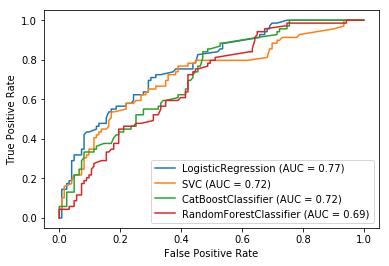

In [131]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(diabetes_LR,X_teste,y_teste)
plot_roc_curve(diabetes_SVM,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_cat,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_RF,X_teste,y_teste, ax=disp.ax_);